In [18]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
from collections import Counter

In [2]:
files = glob.glob('search+youtube/*.csv')

/Users/miriamblumenthal/opt/anaconda3/envs/covidProject/lib/python3.7/site-packages/ipykernel_launcher.py:98: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/miriamblumenthal/opt/anaconda3/envs/covidProject/lib/python3.7/site-packages/ipykernel_launcher.py:147: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


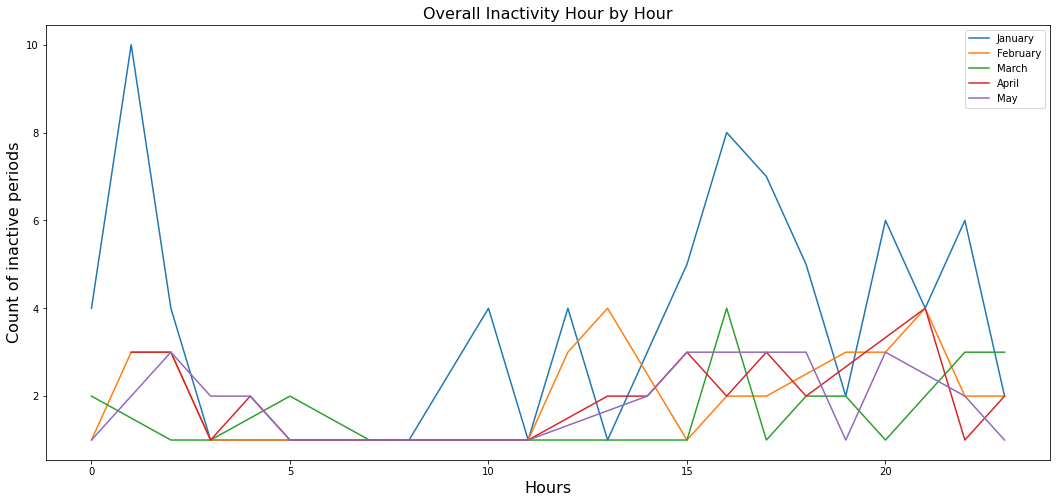

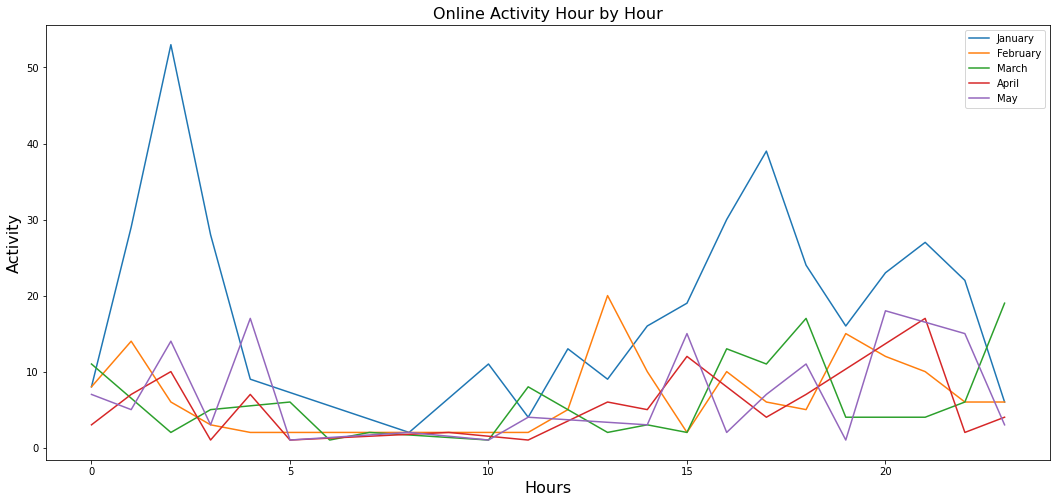

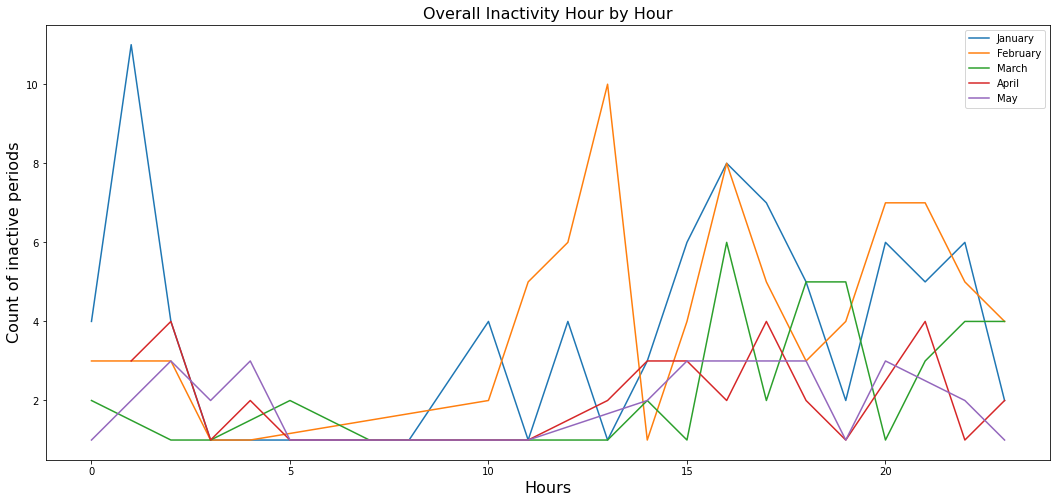

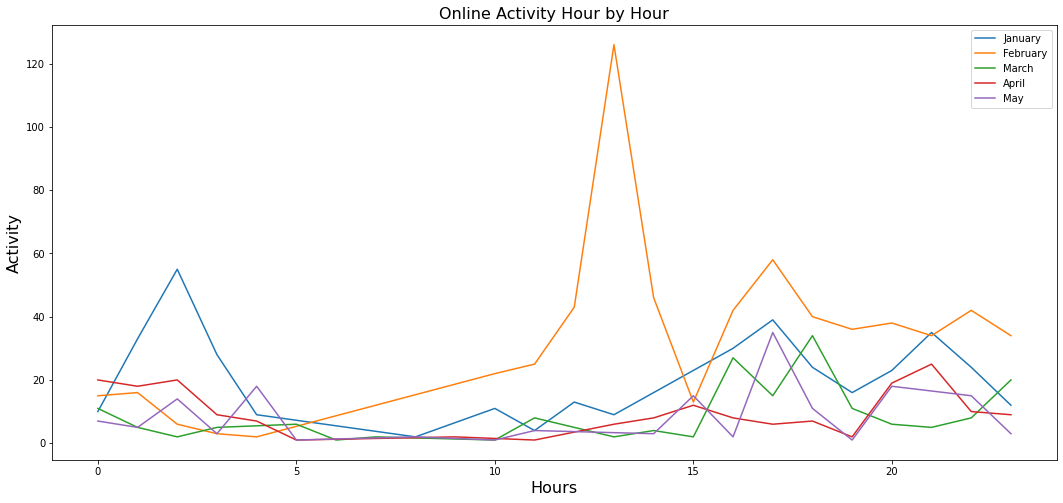

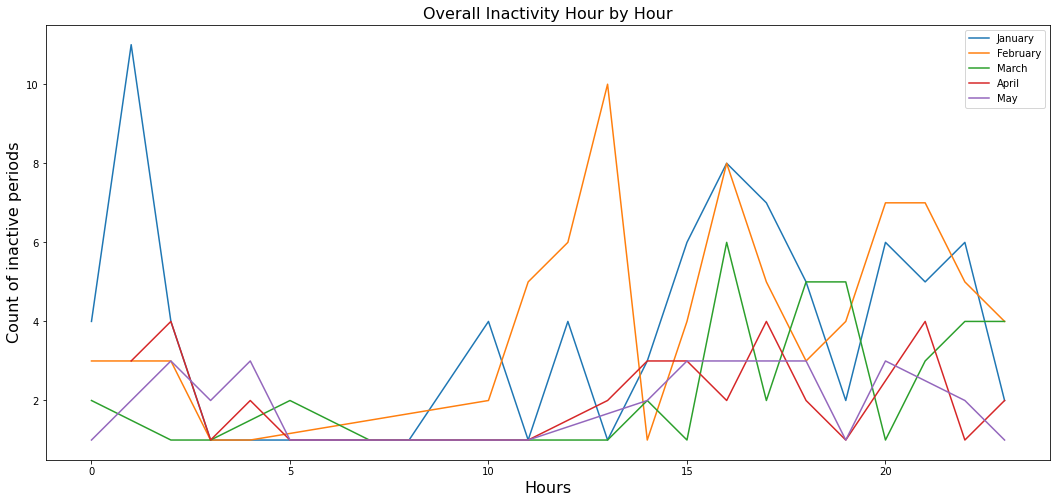

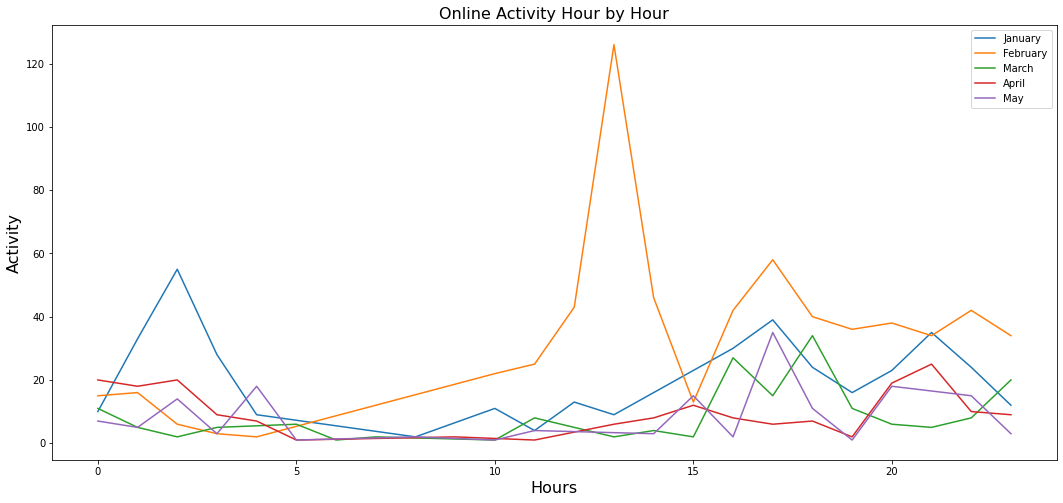

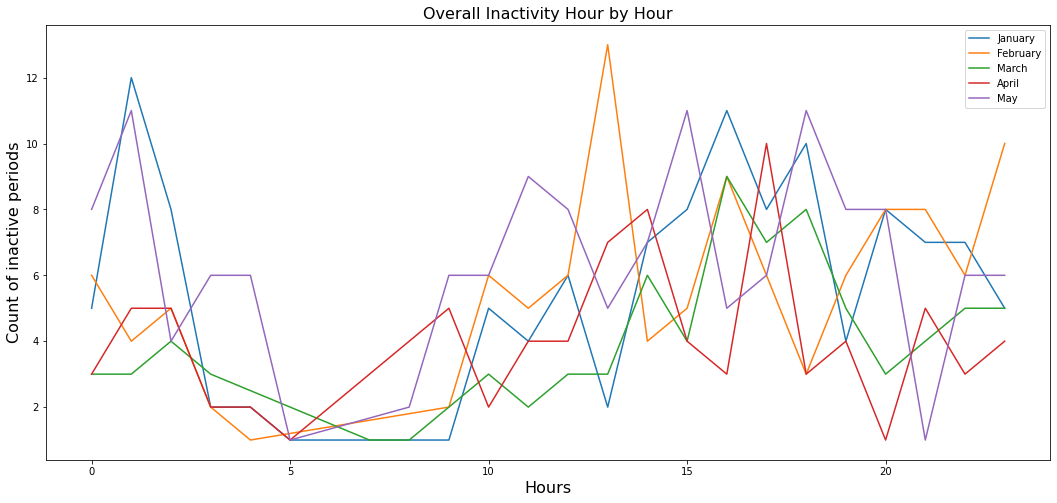

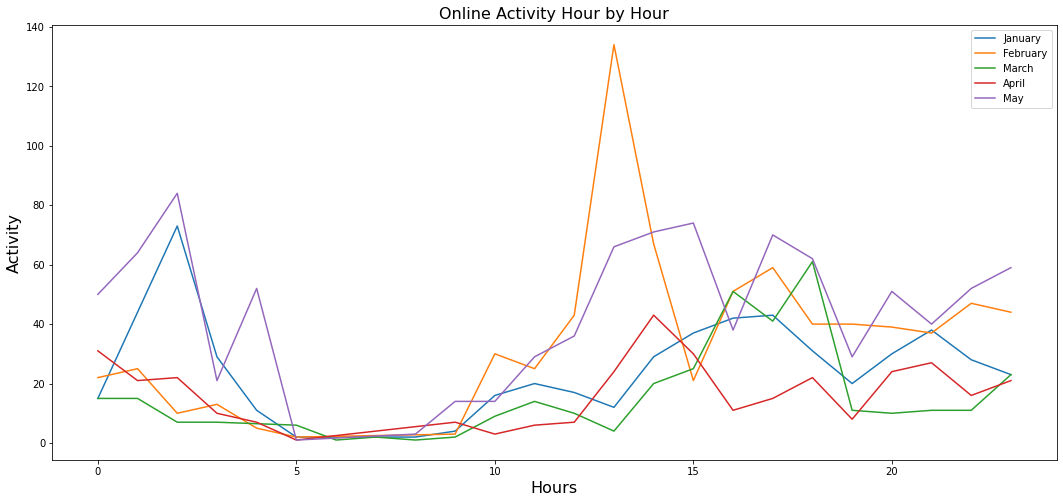

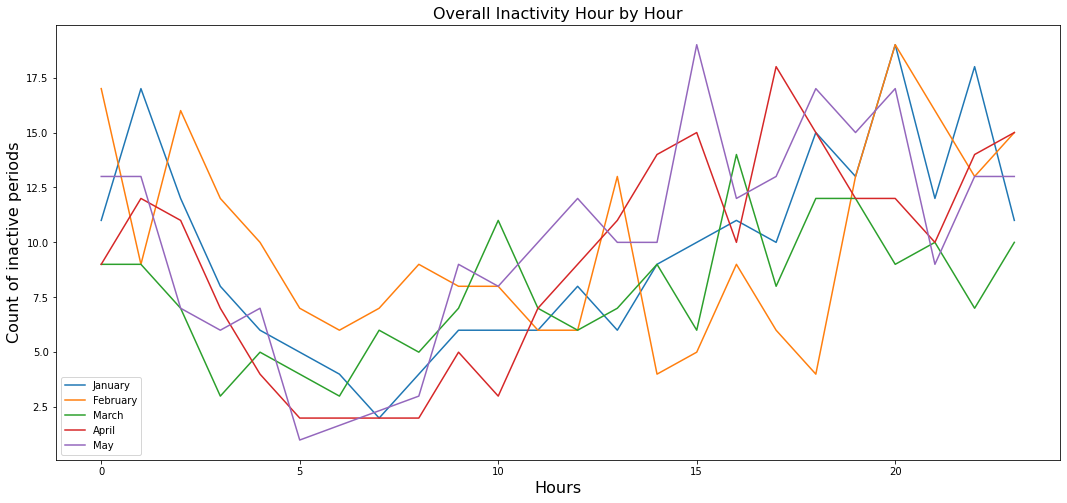

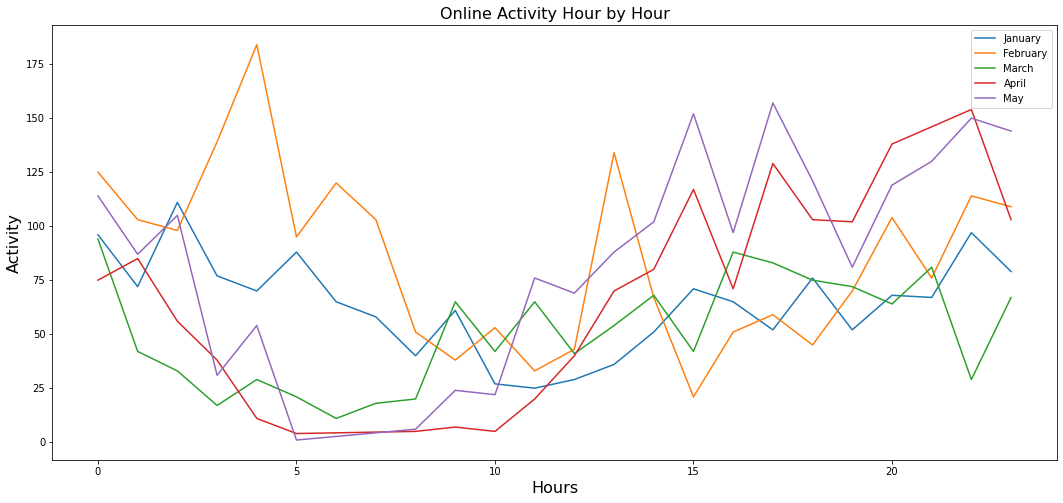

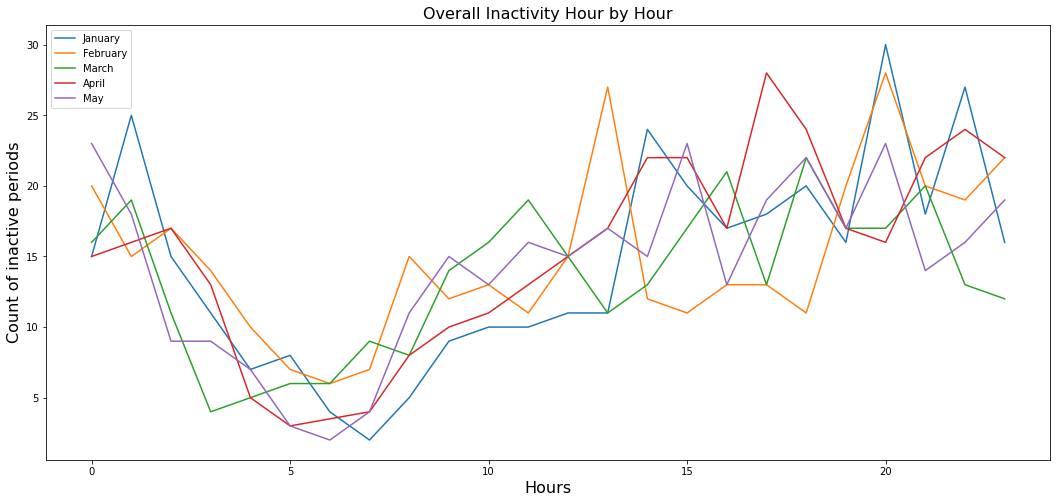

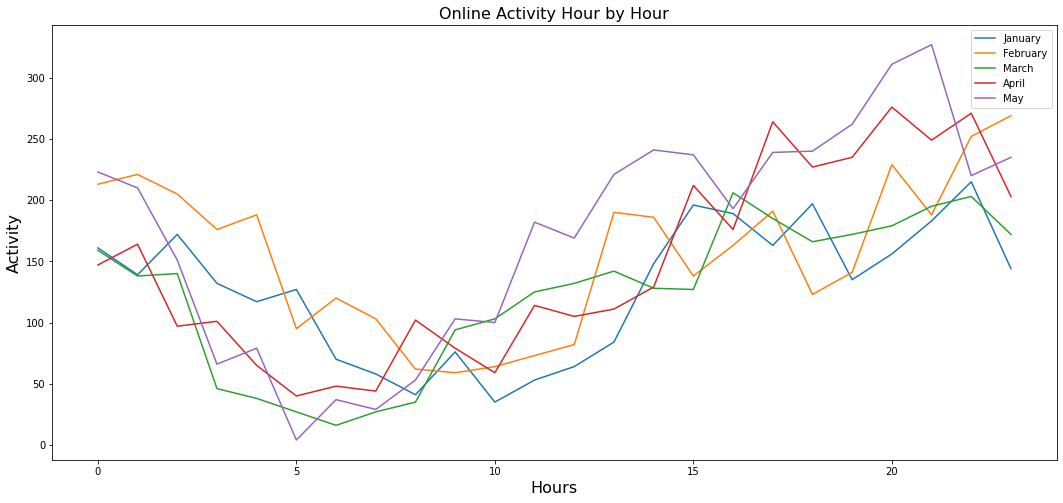

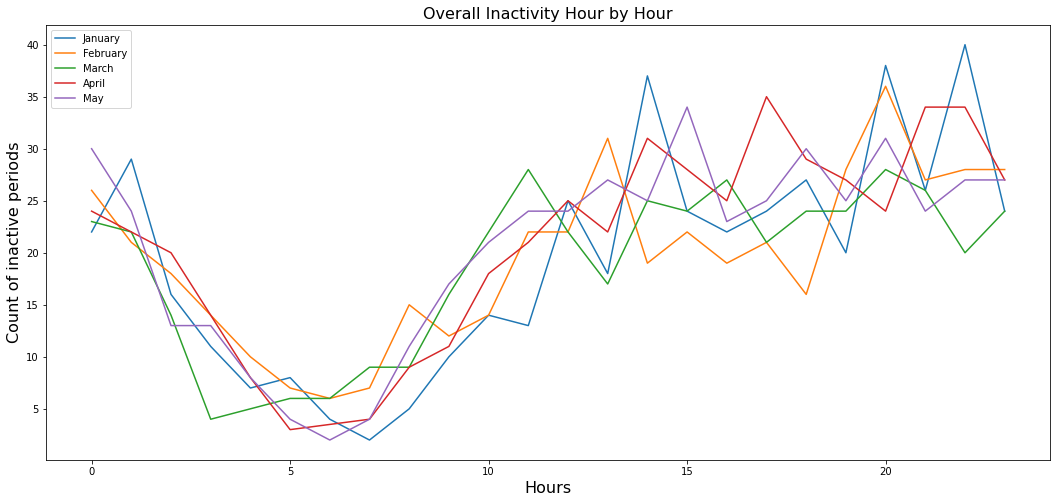

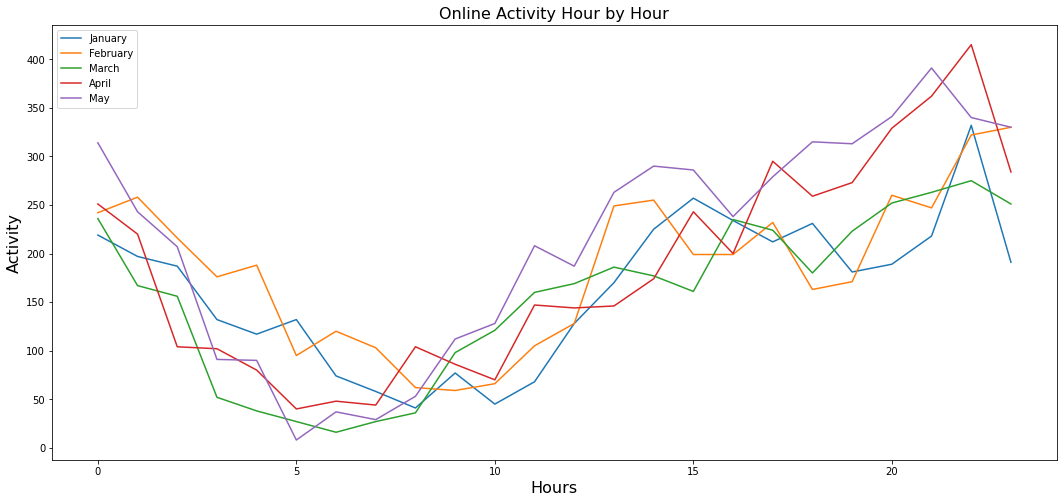

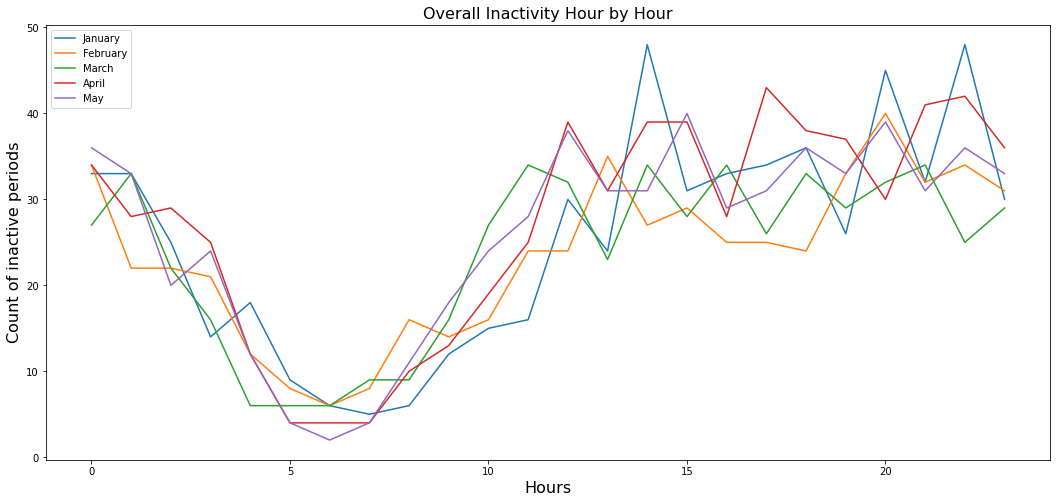

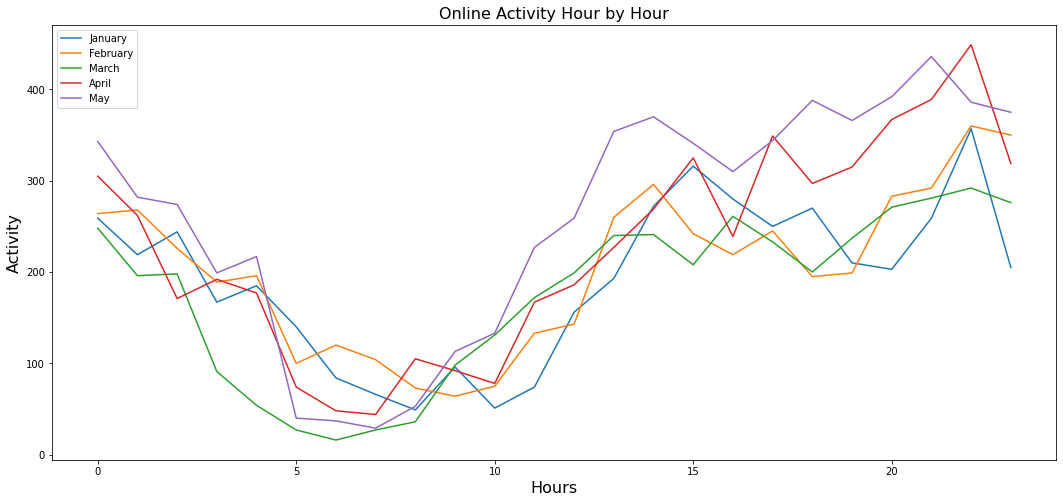

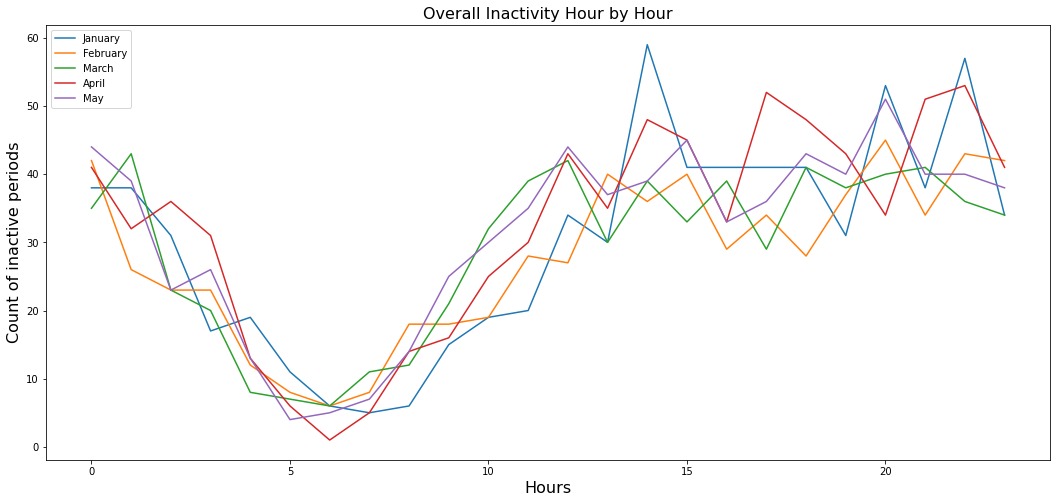

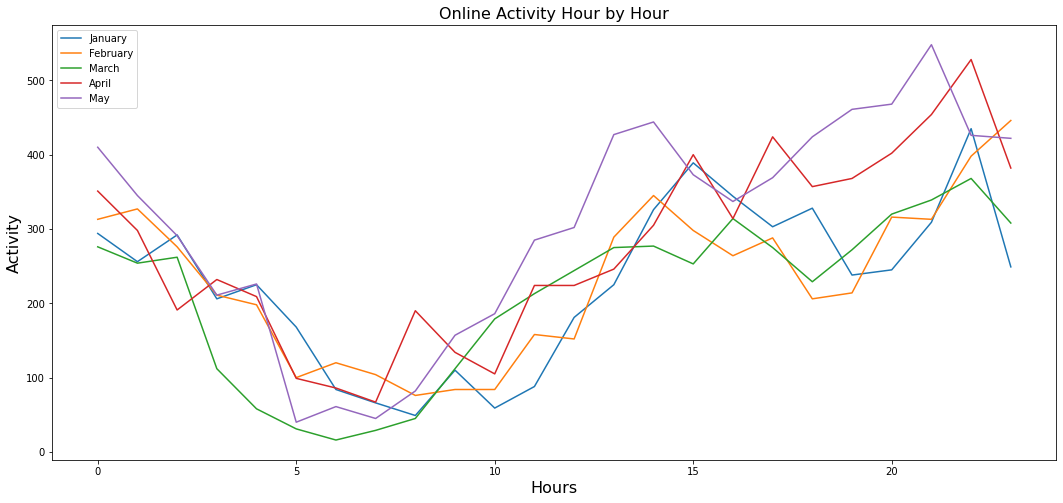

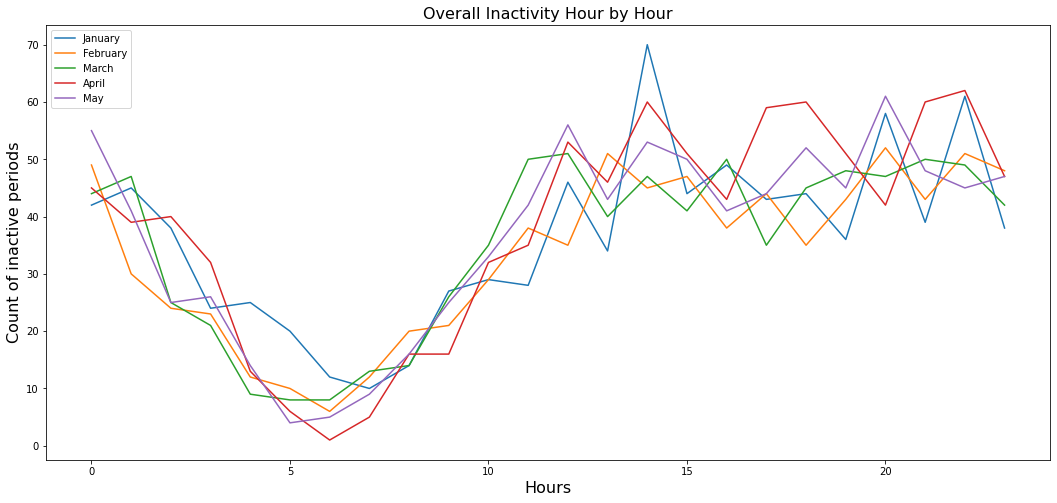

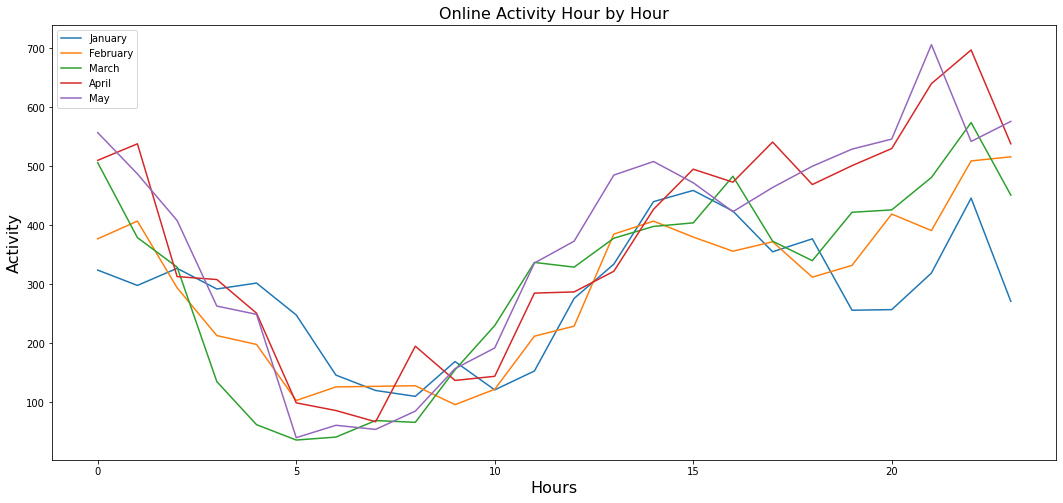

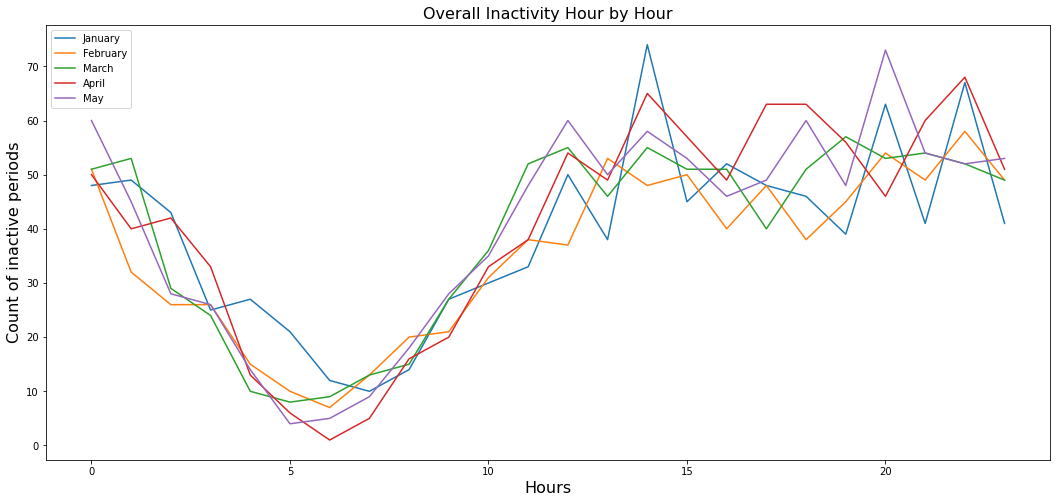

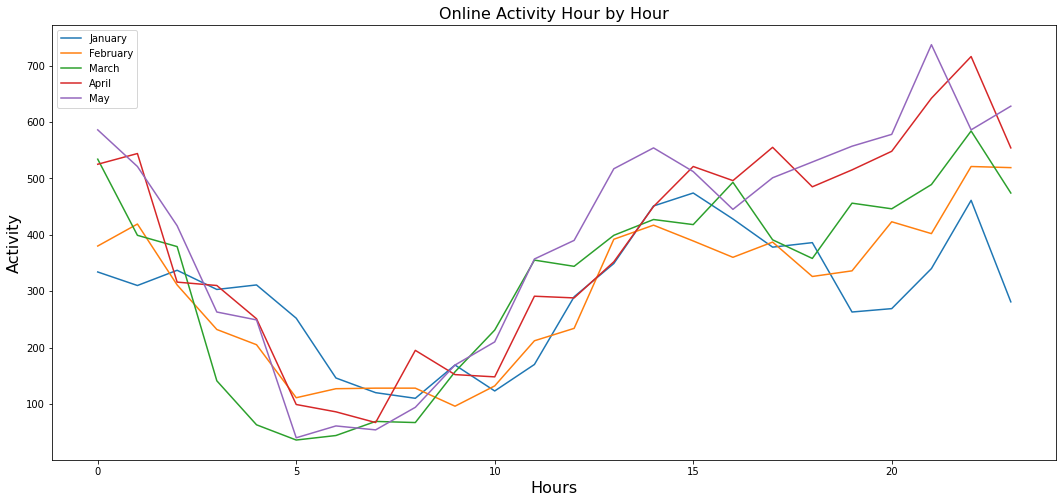

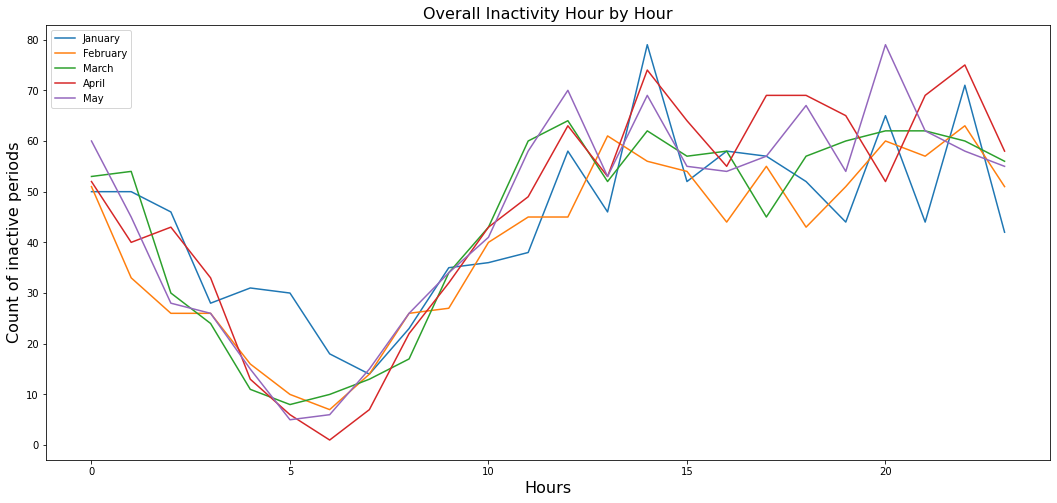

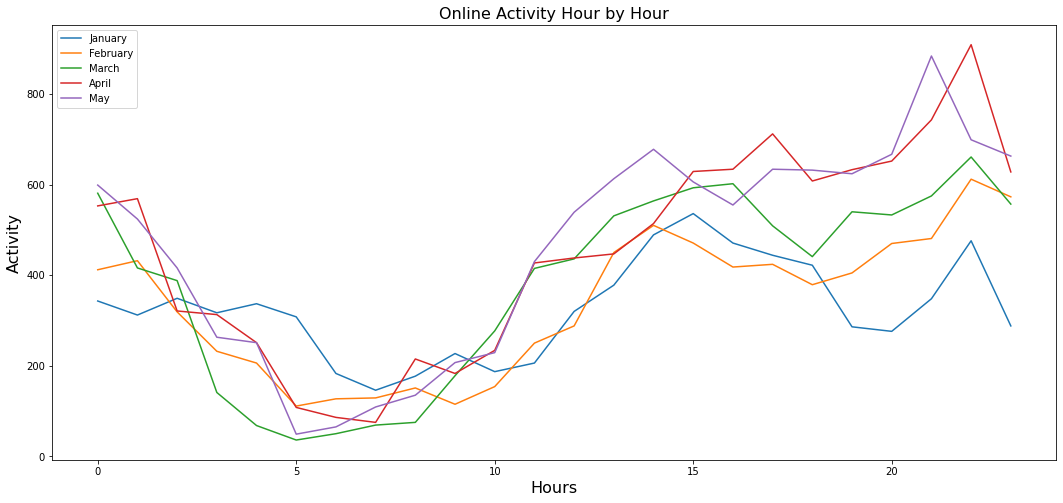

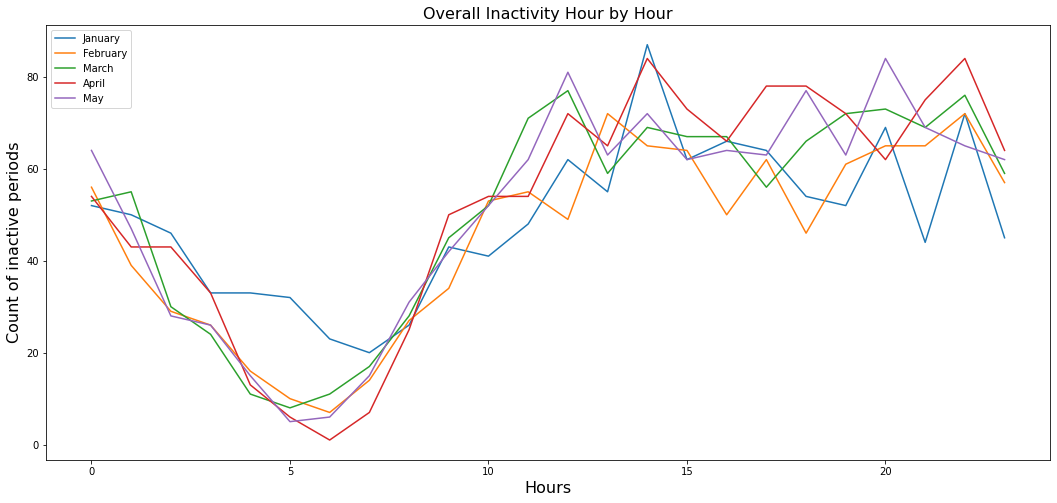

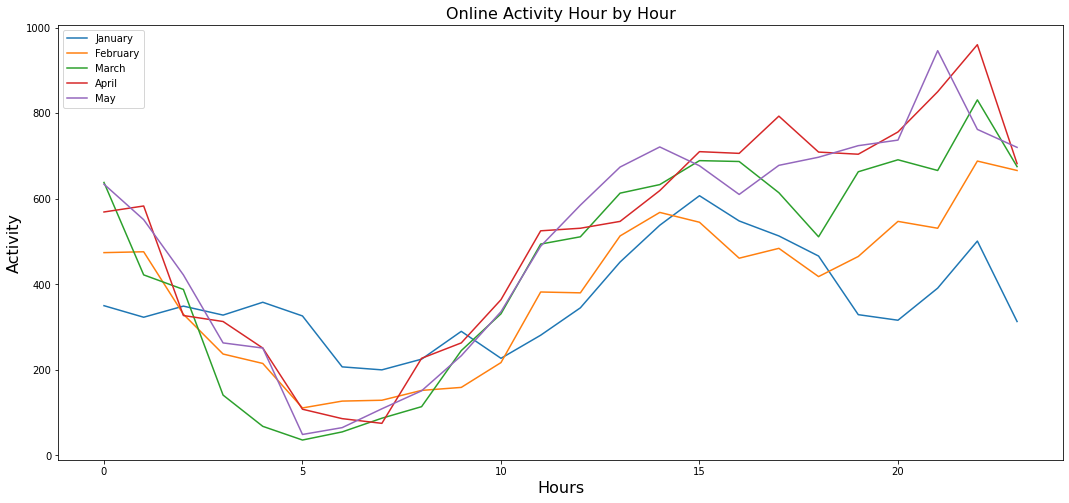

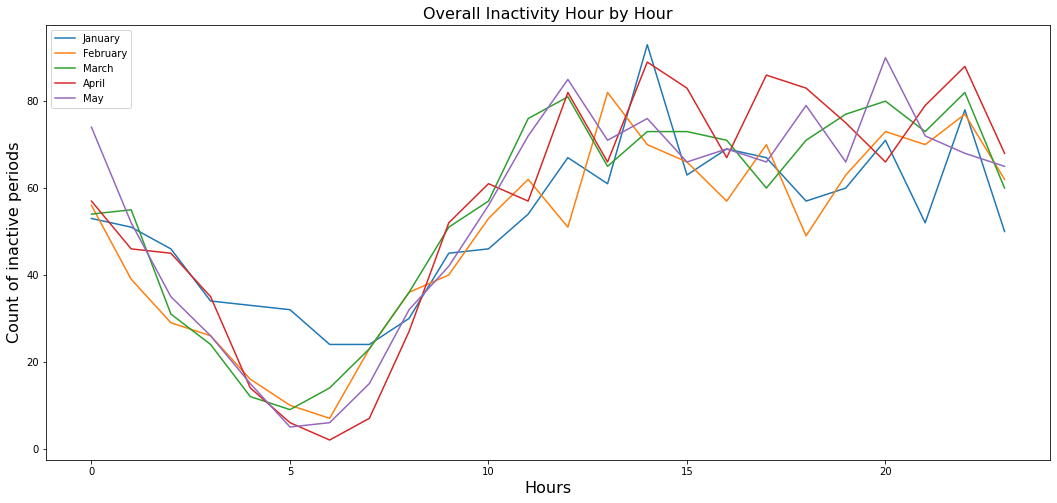

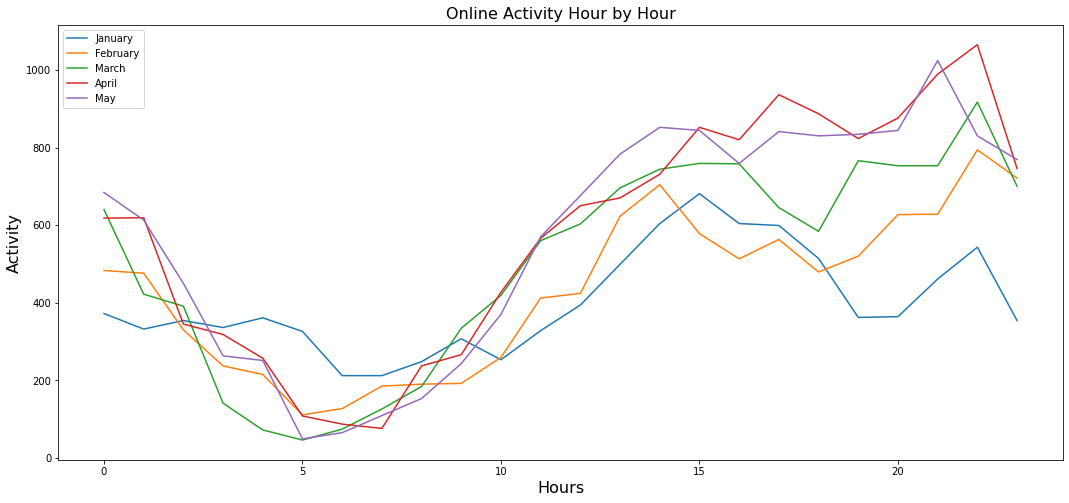

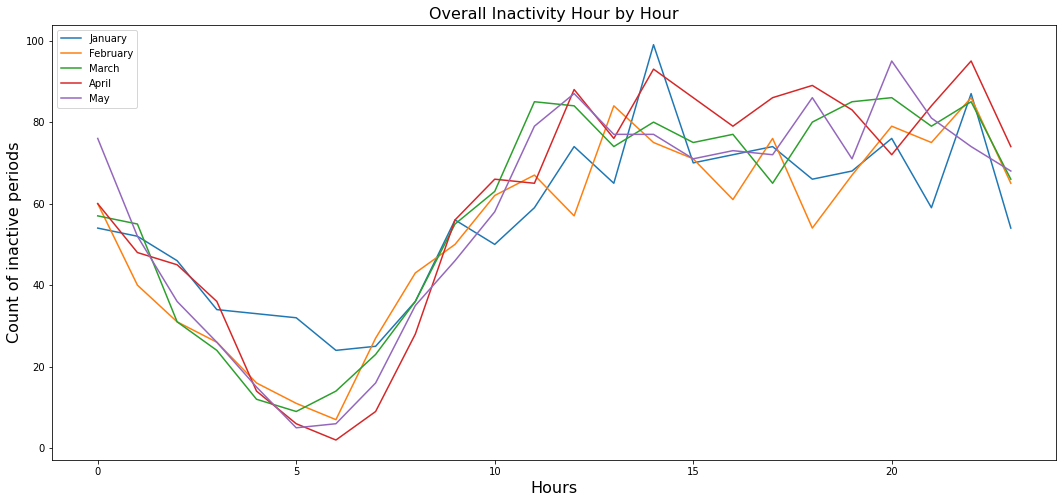

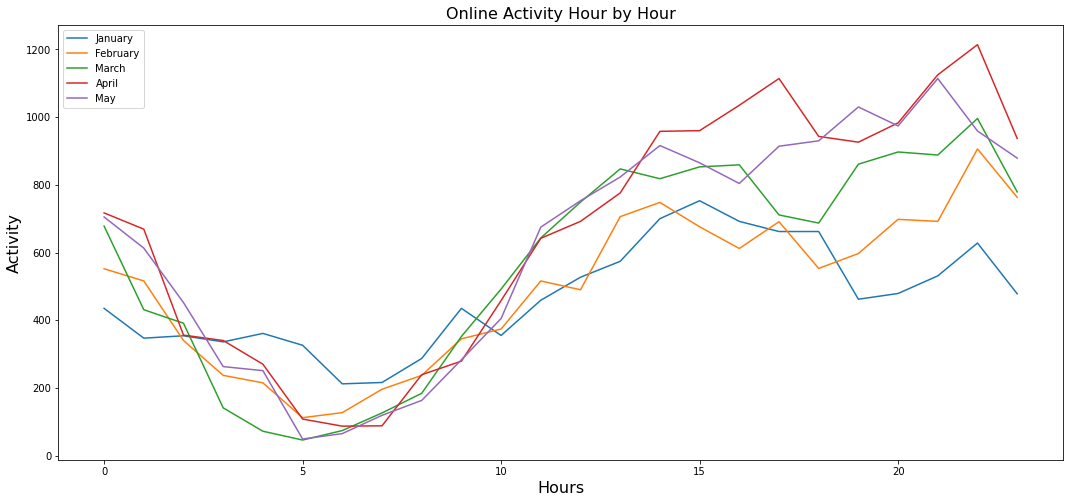

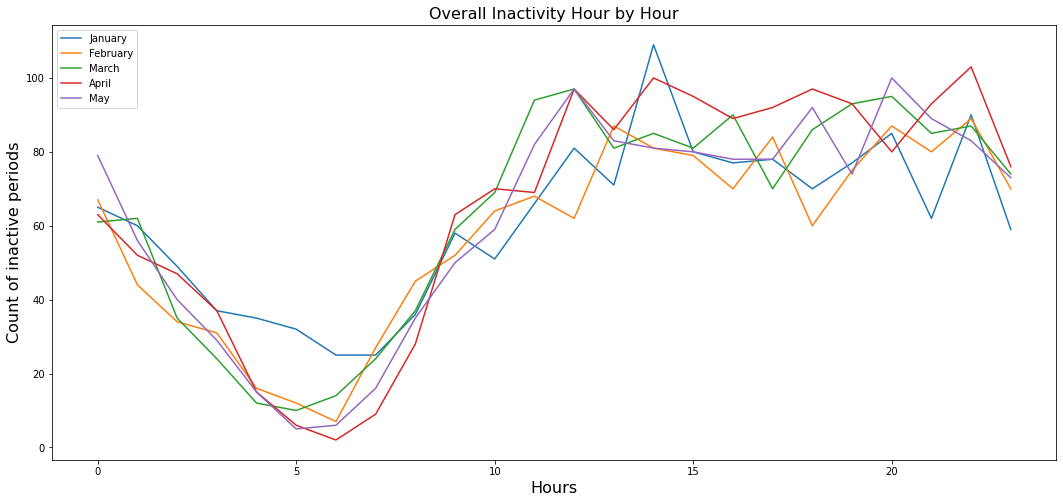

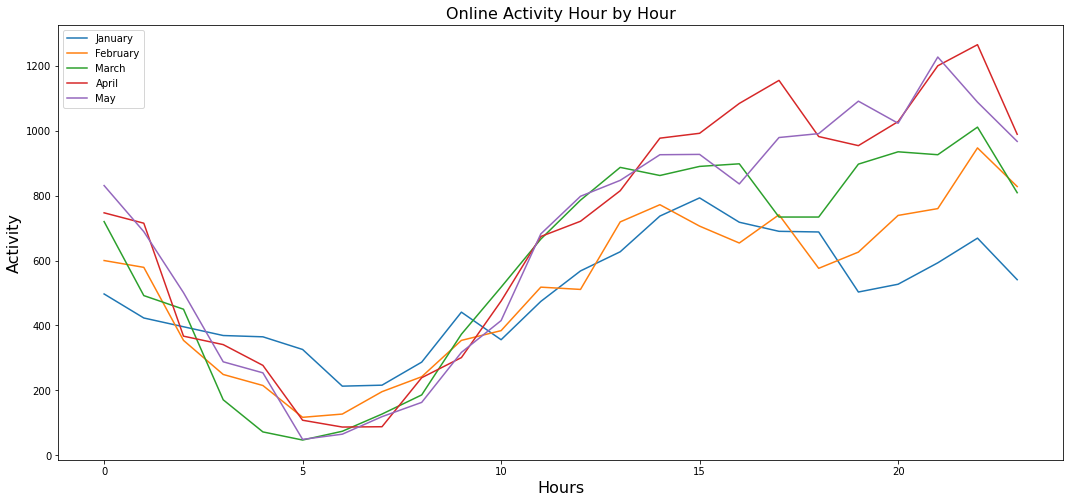

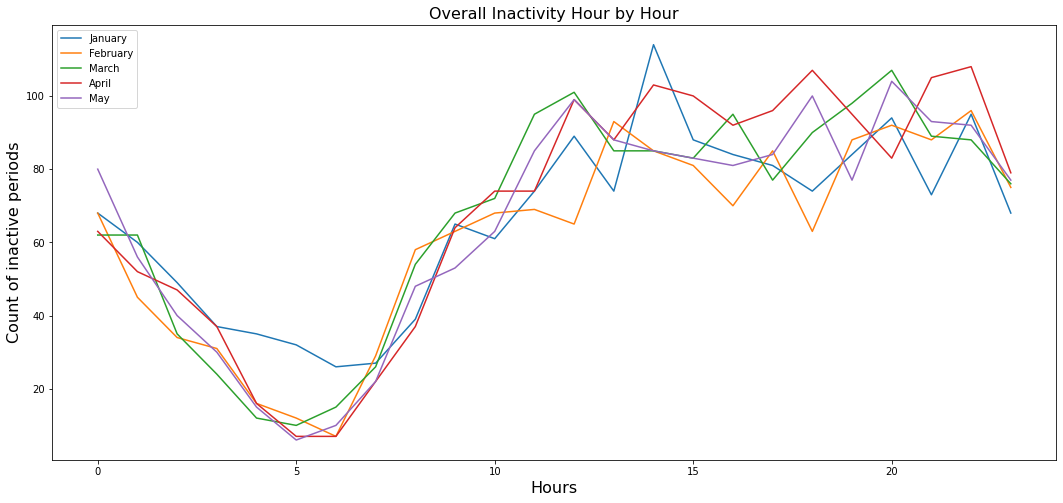

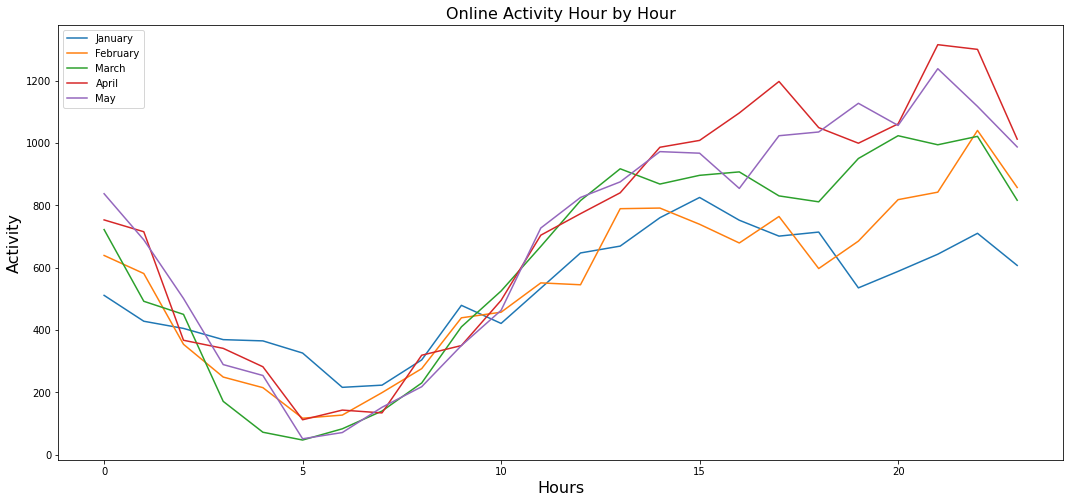

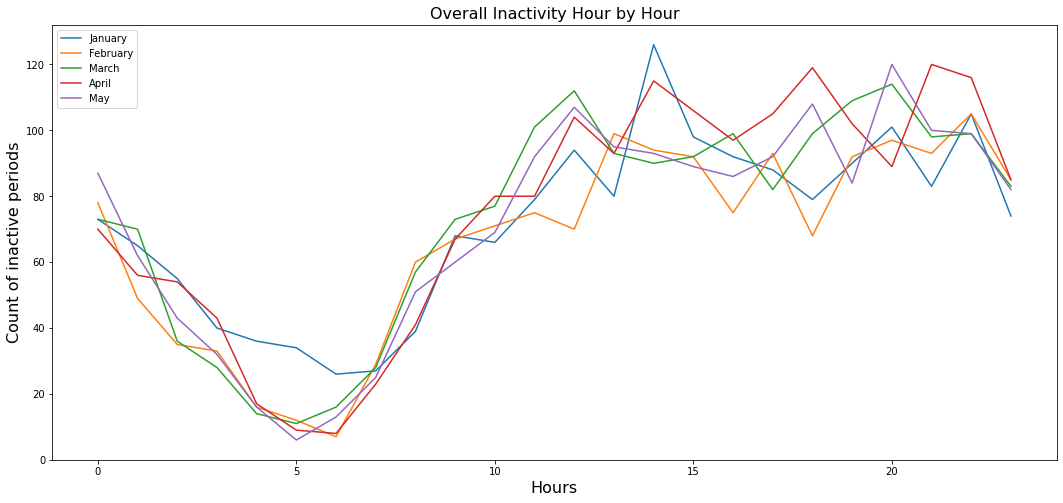

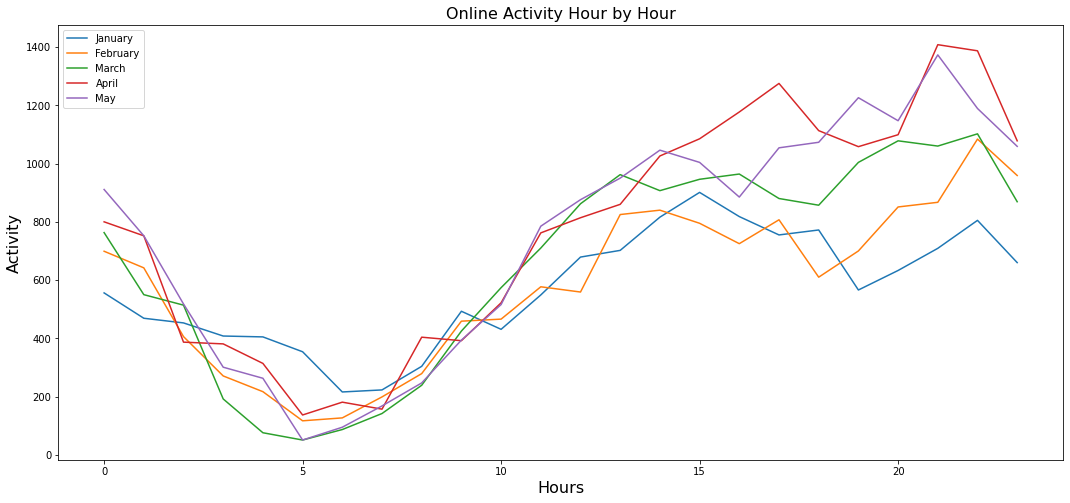

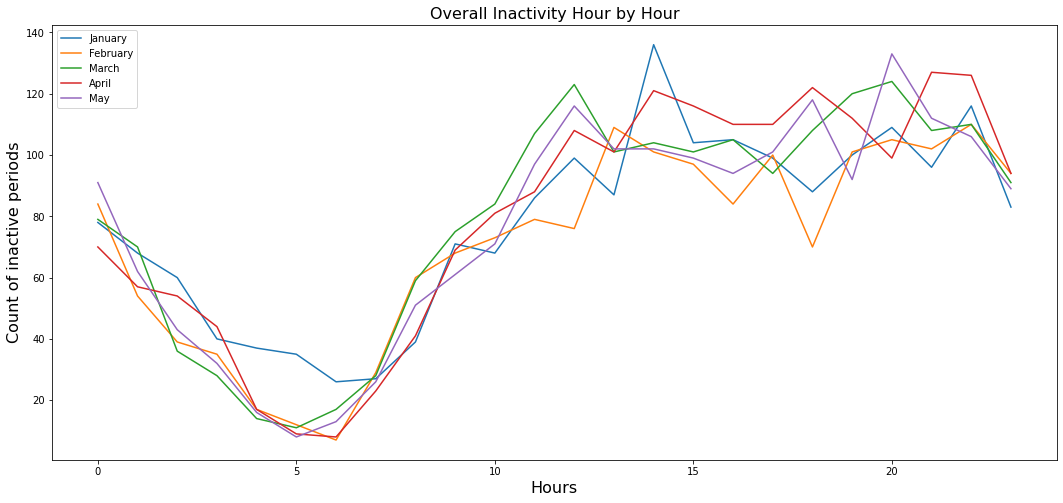

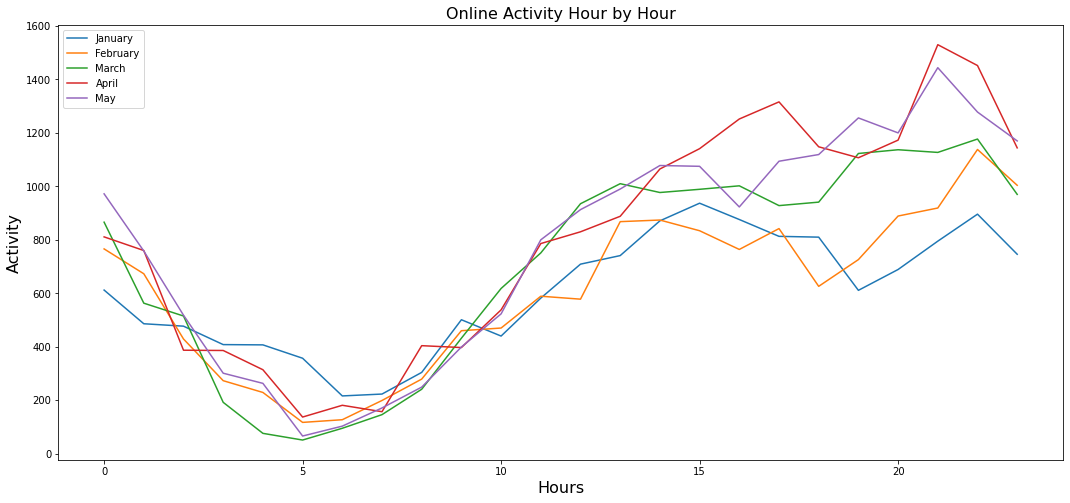

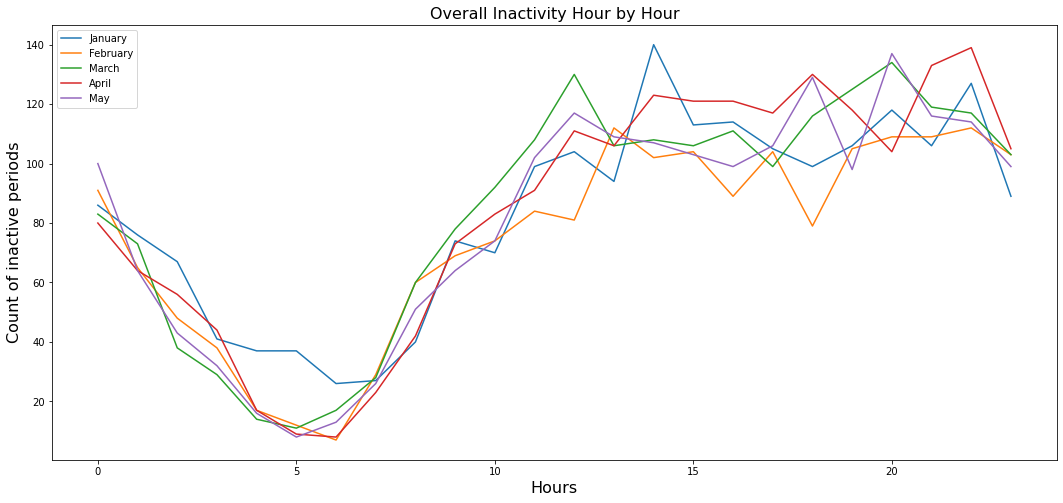

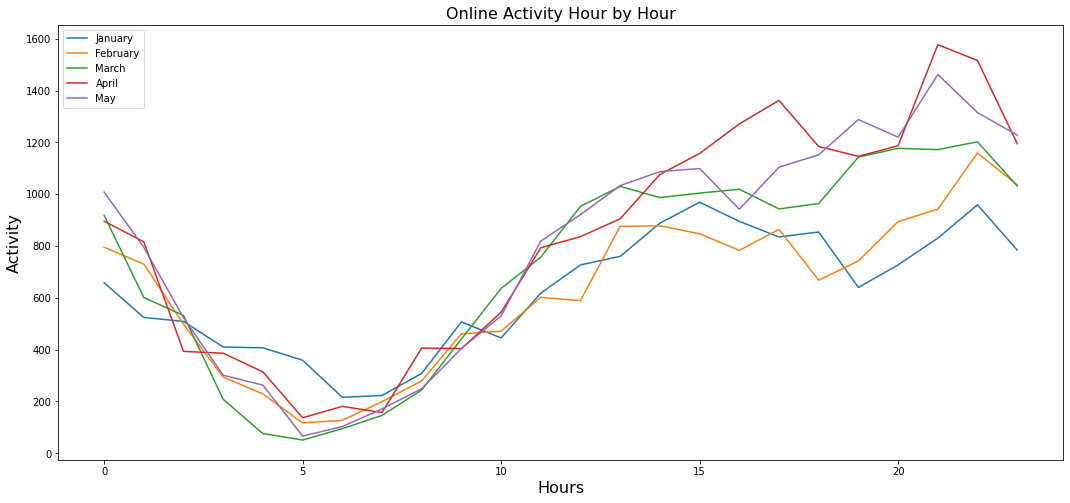

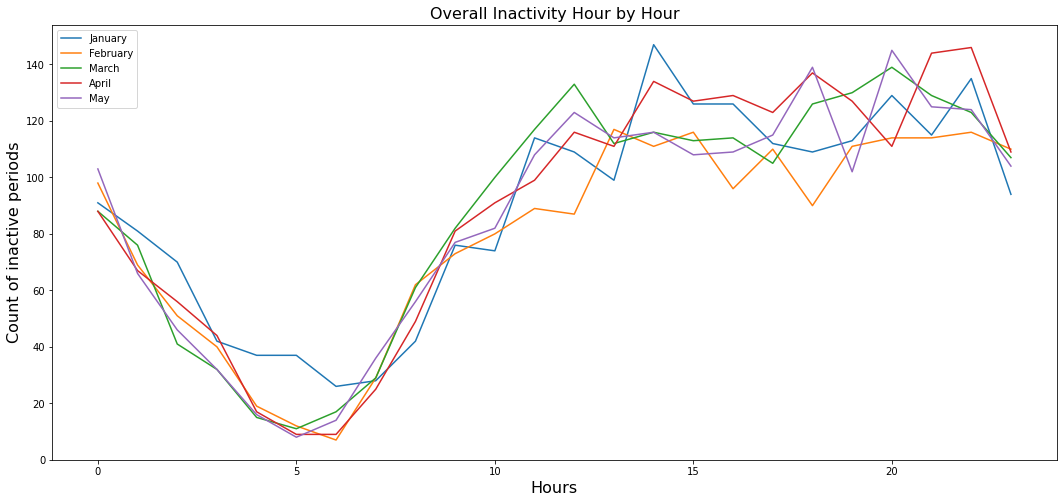

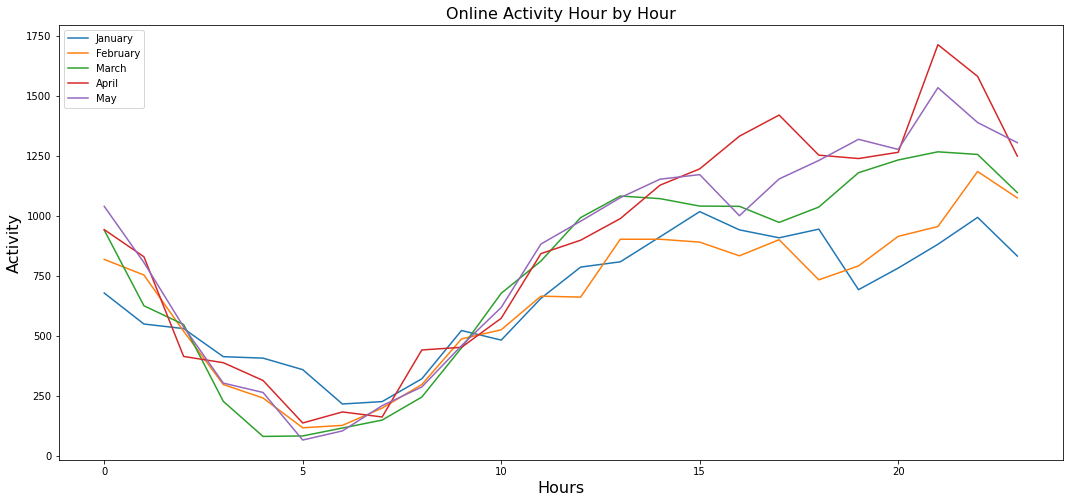

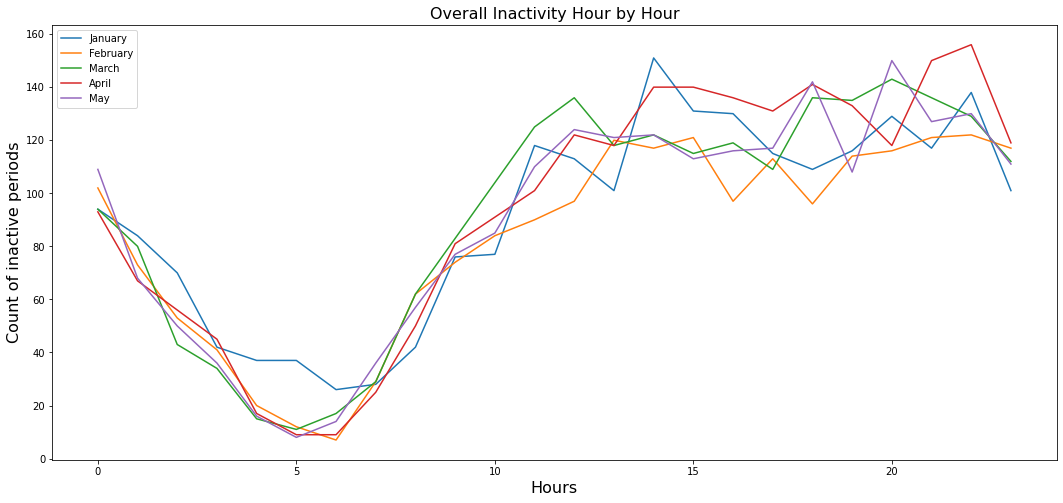

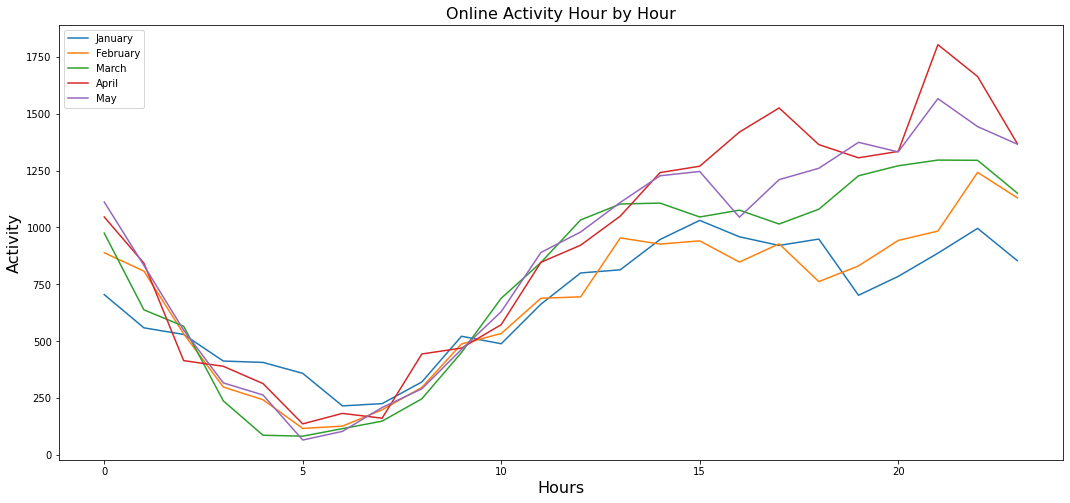

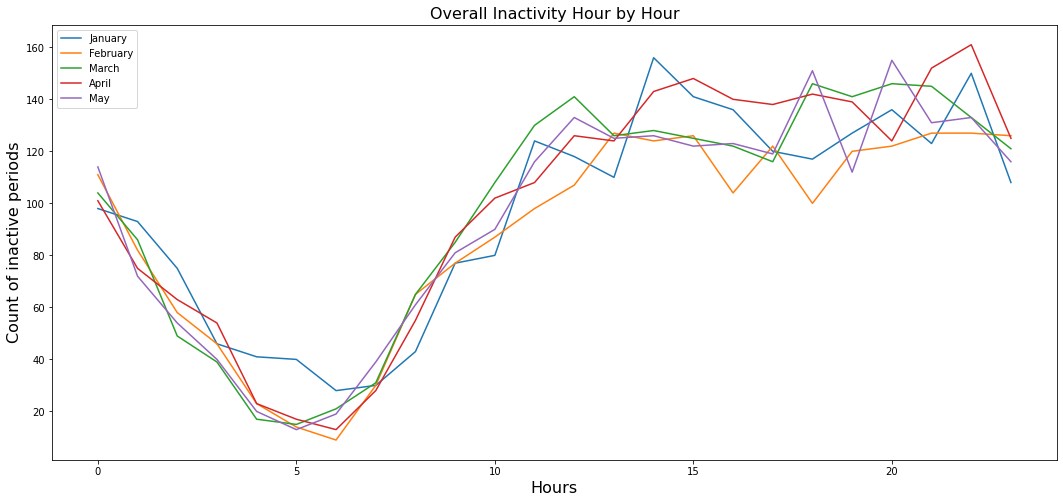

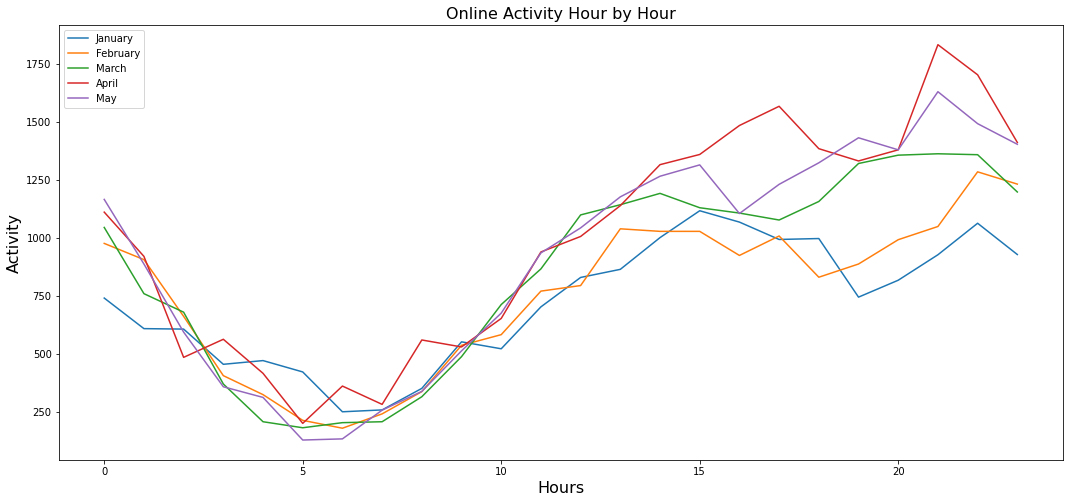

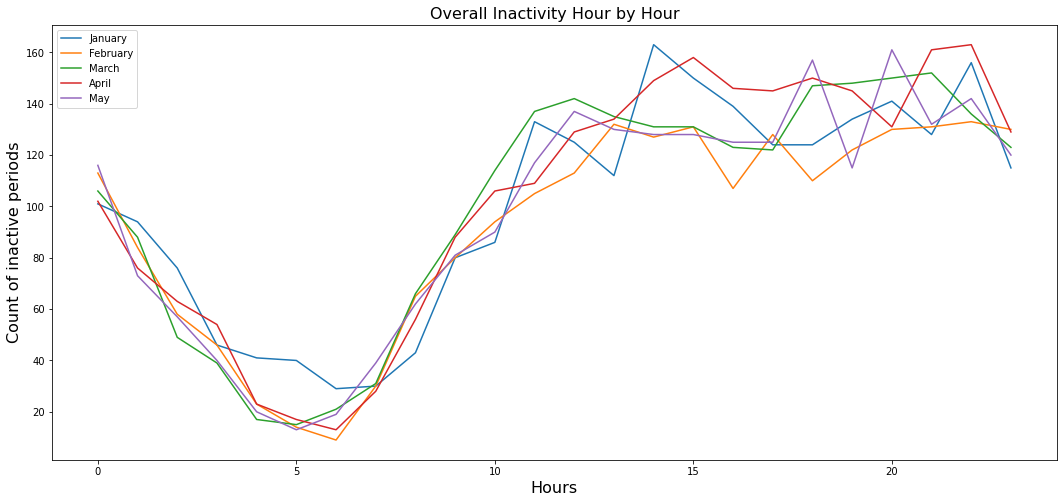

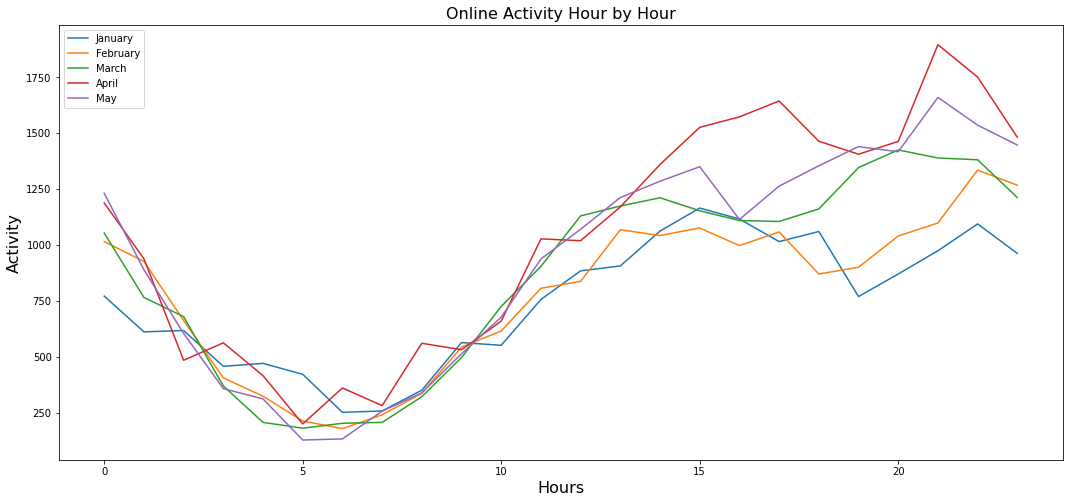

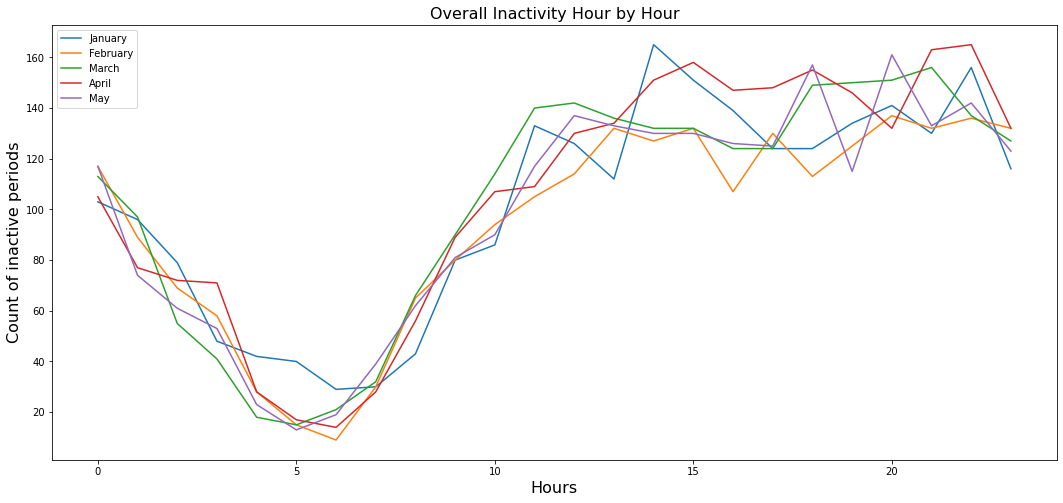

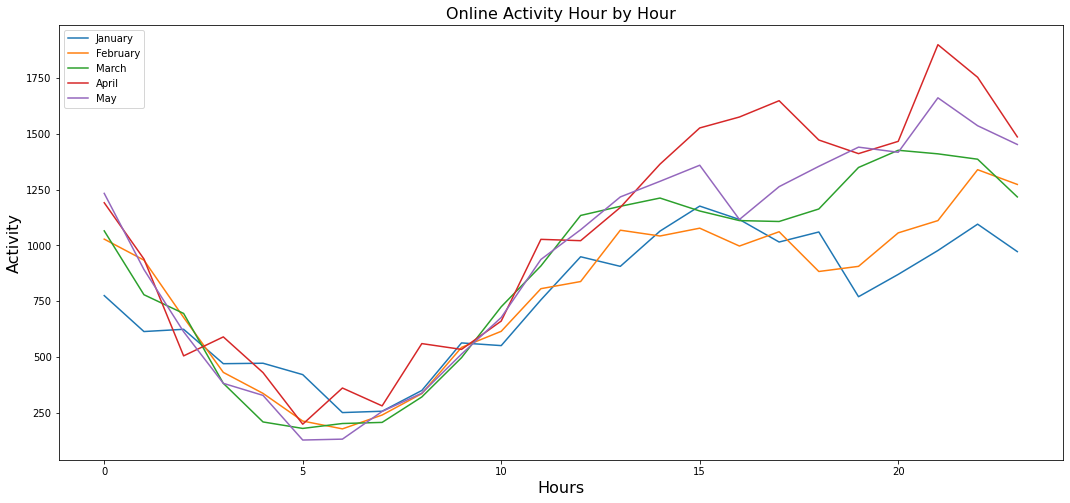

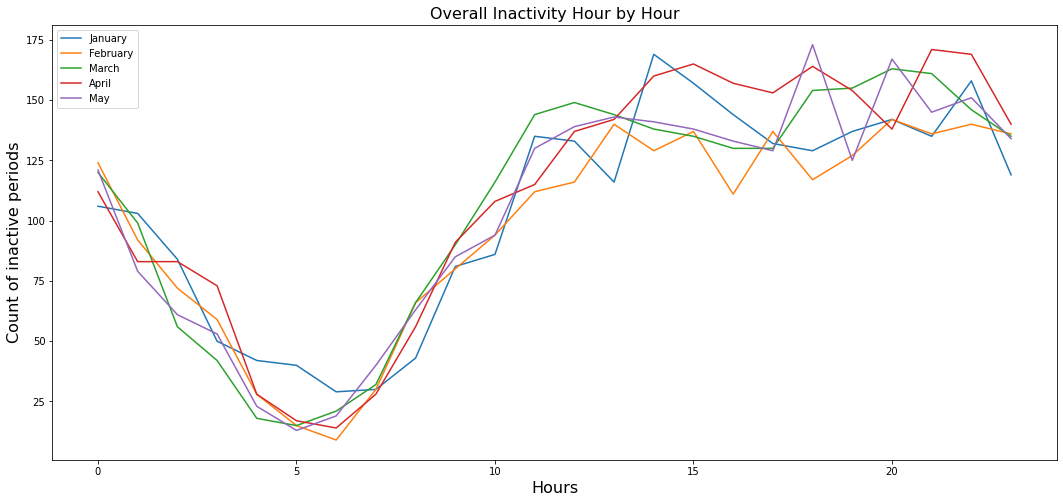

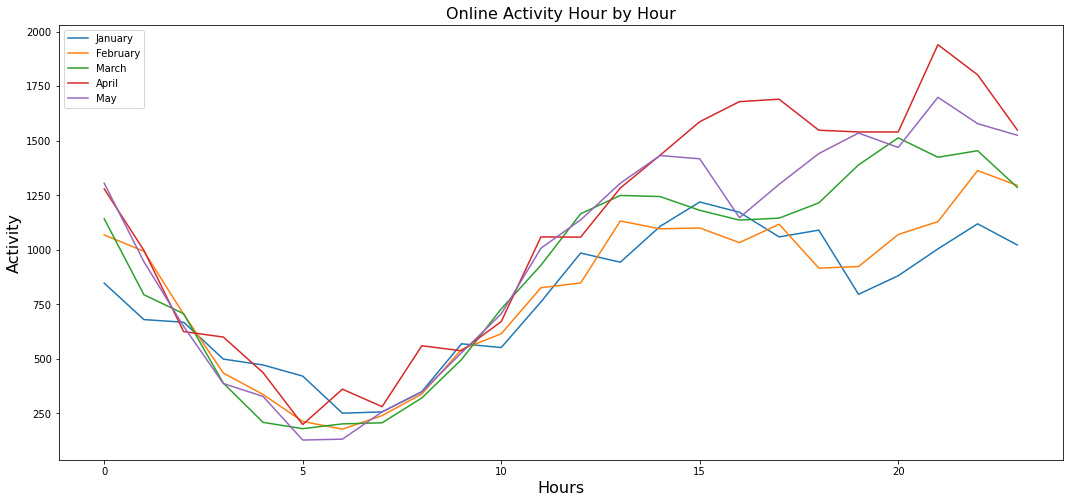

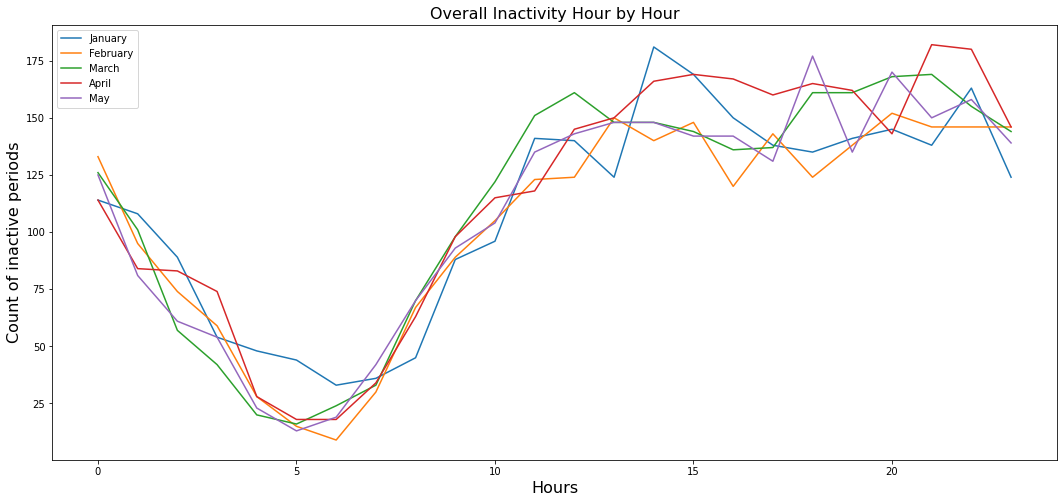

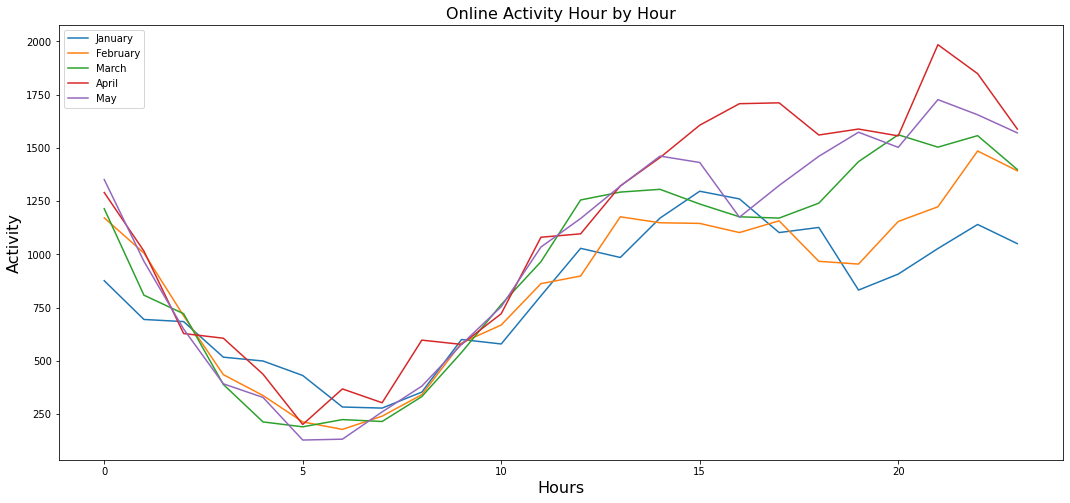

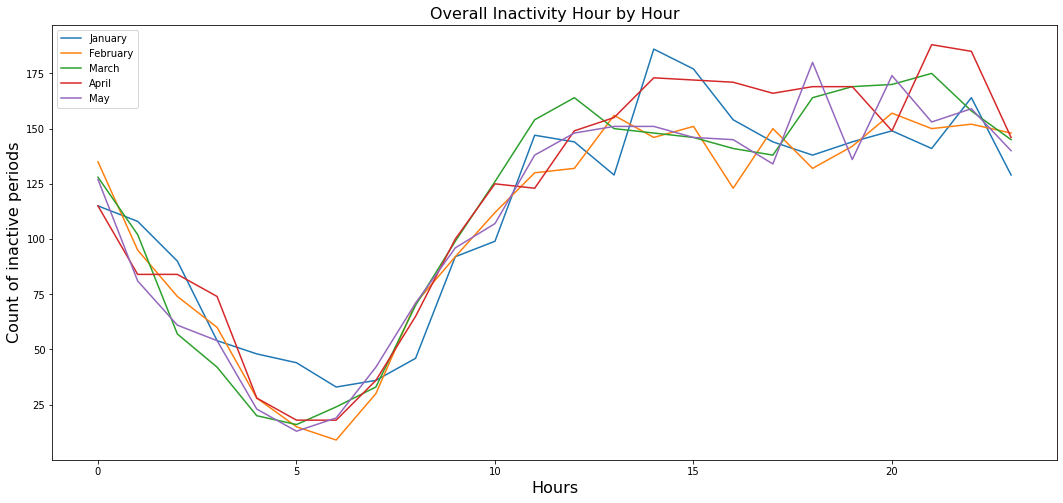

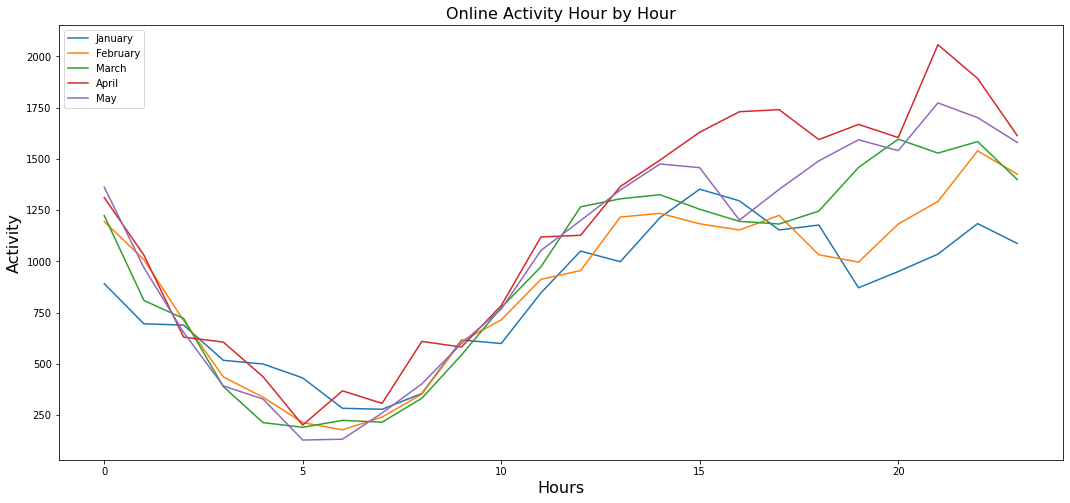

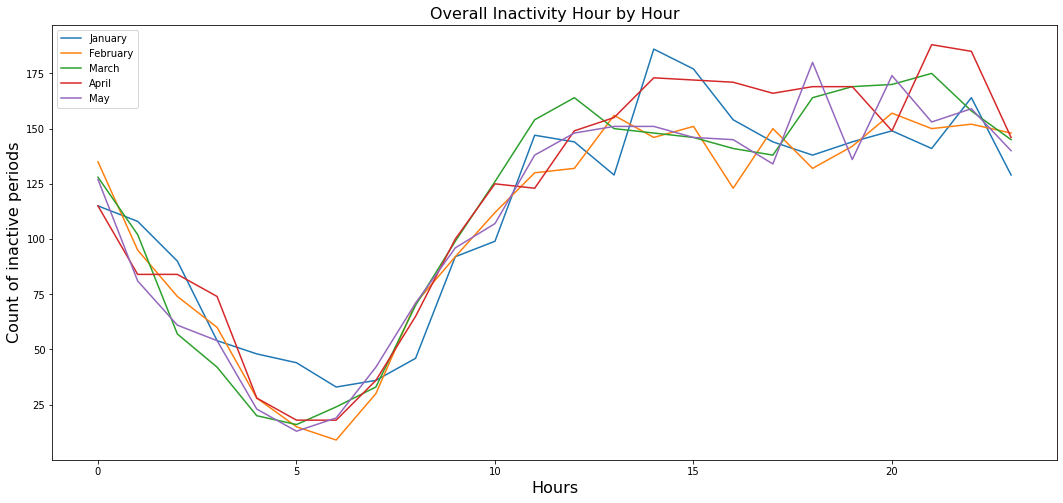

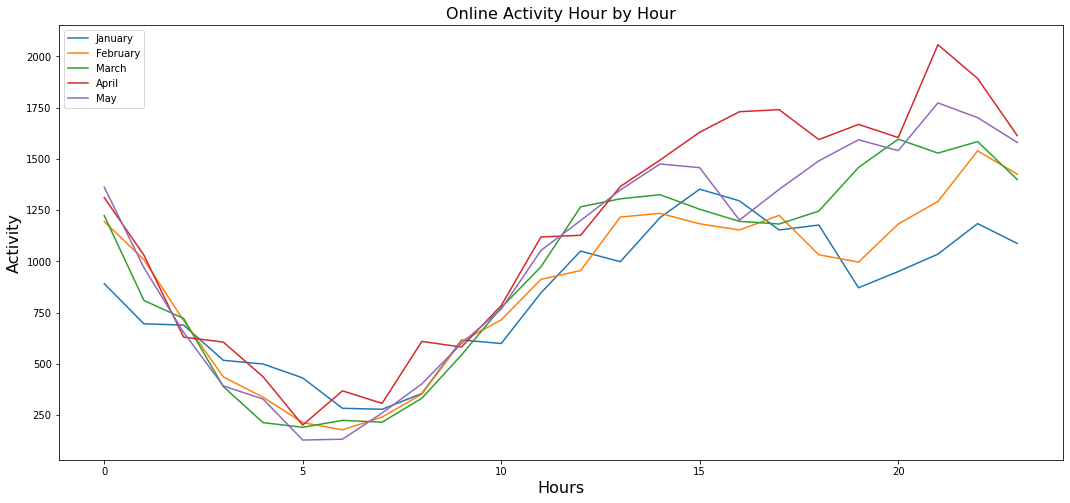

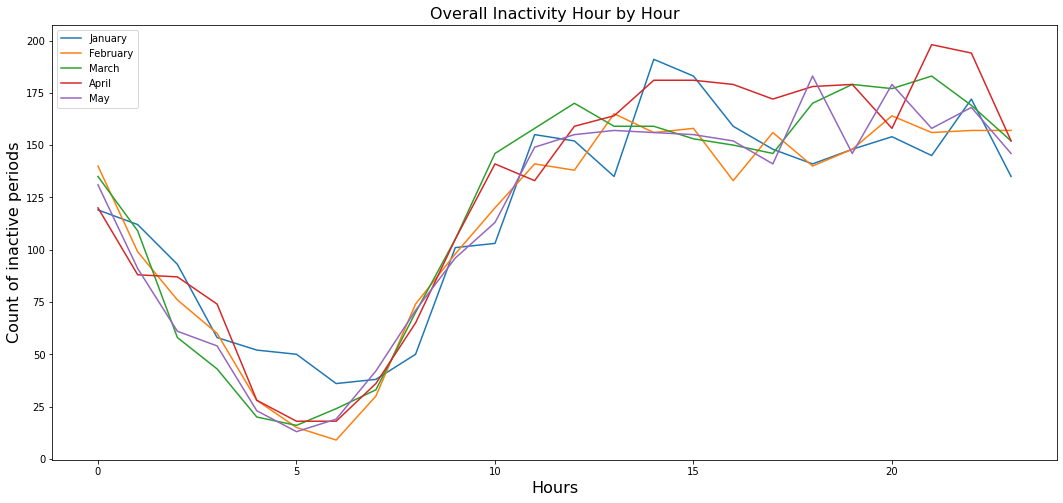

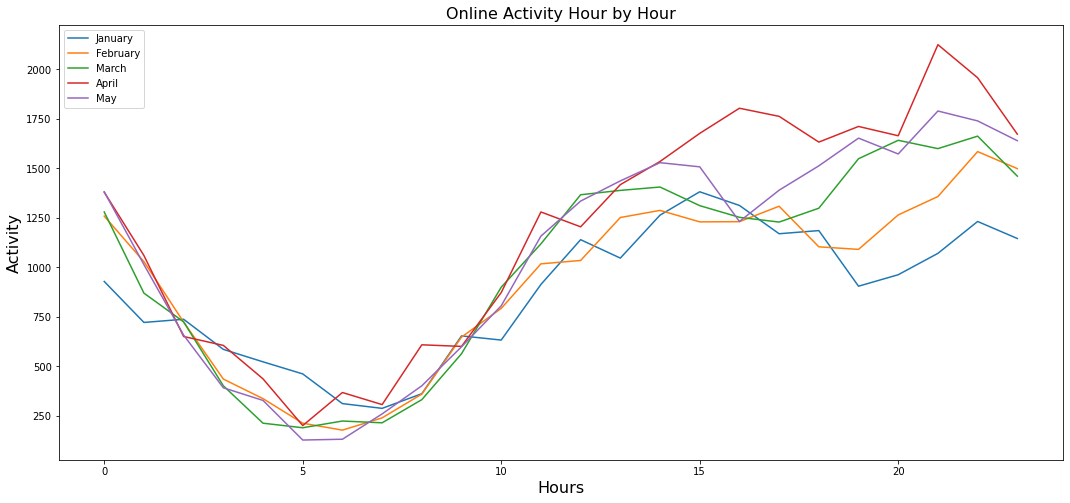

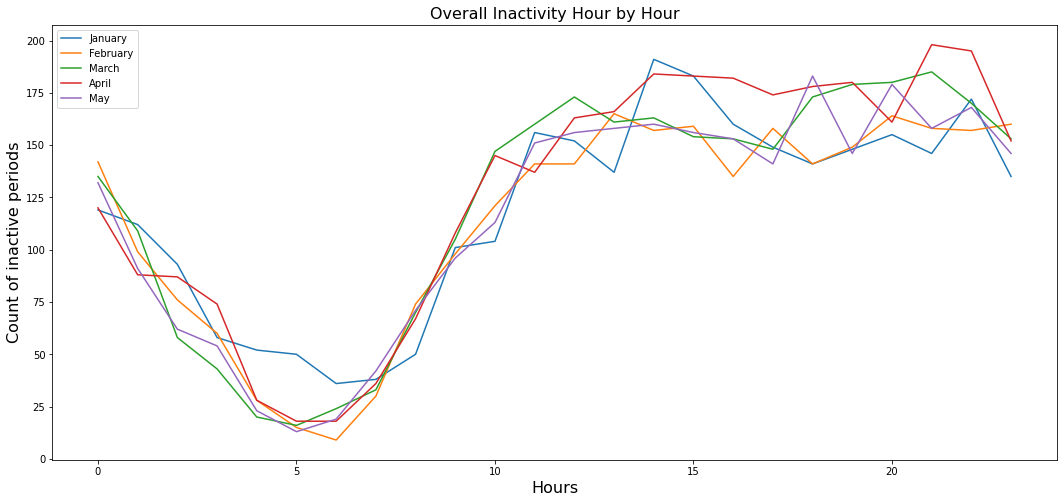

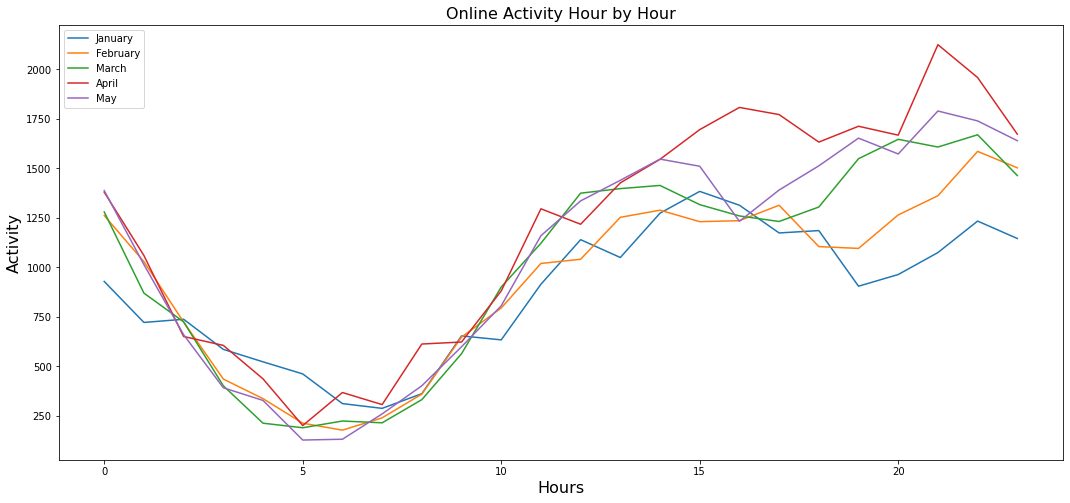

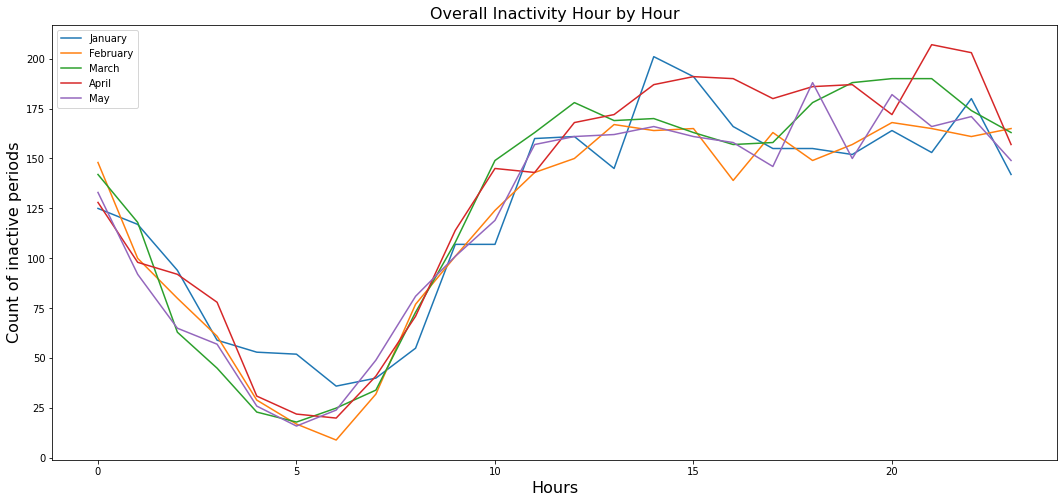

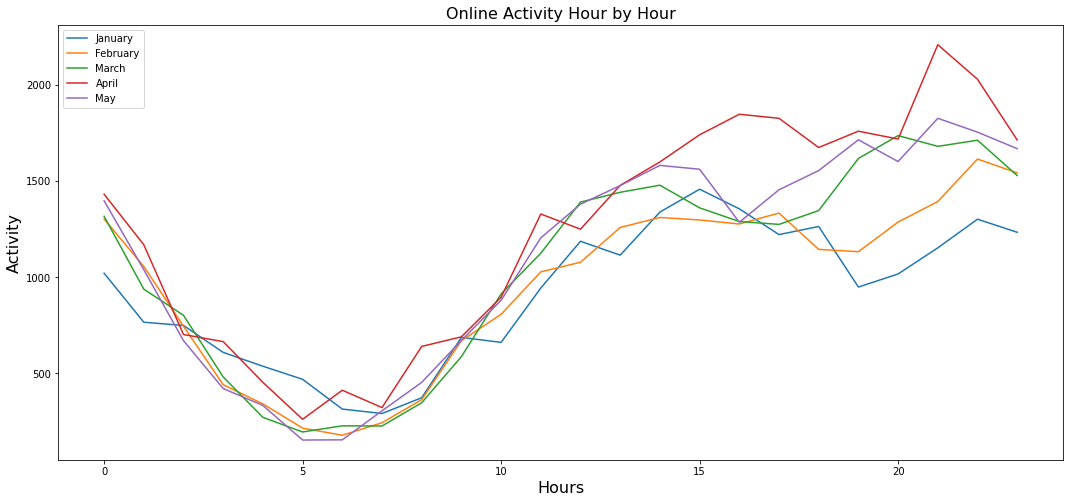

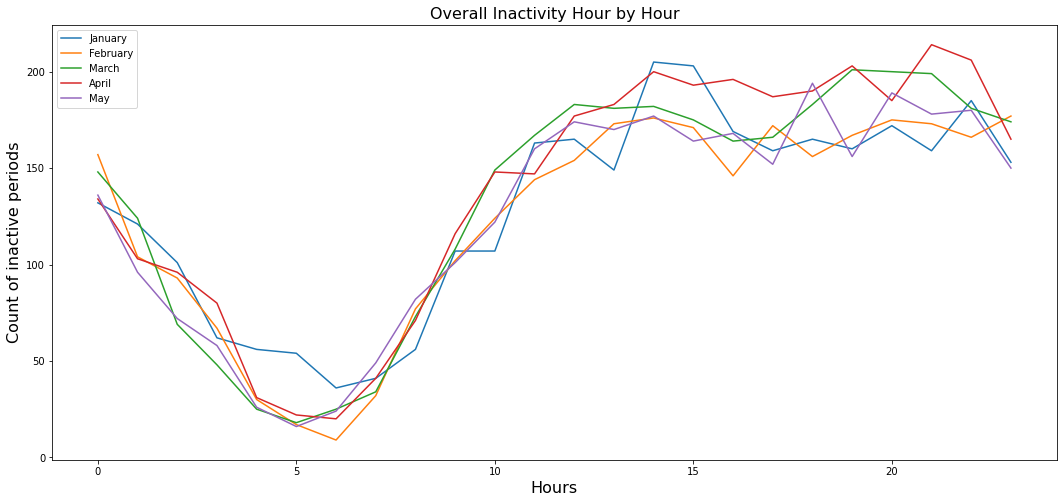

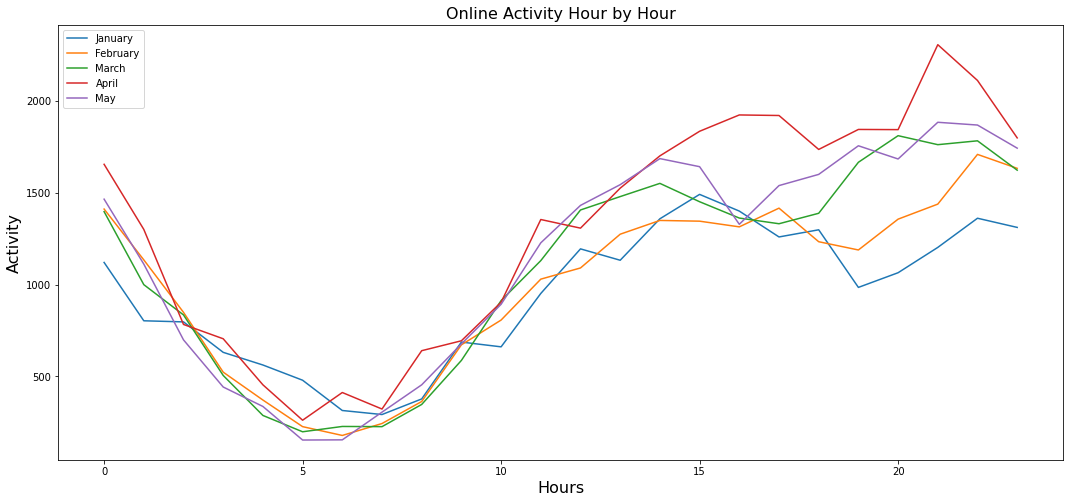

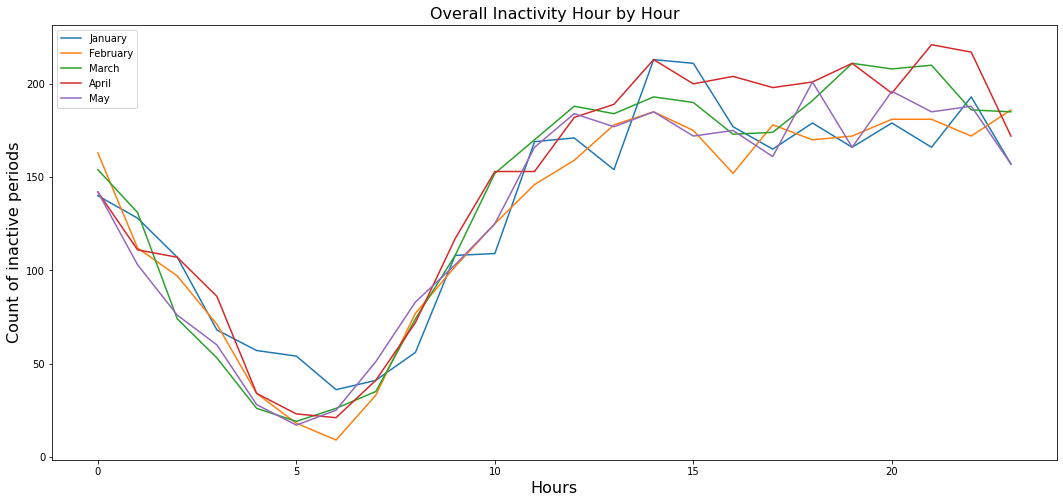

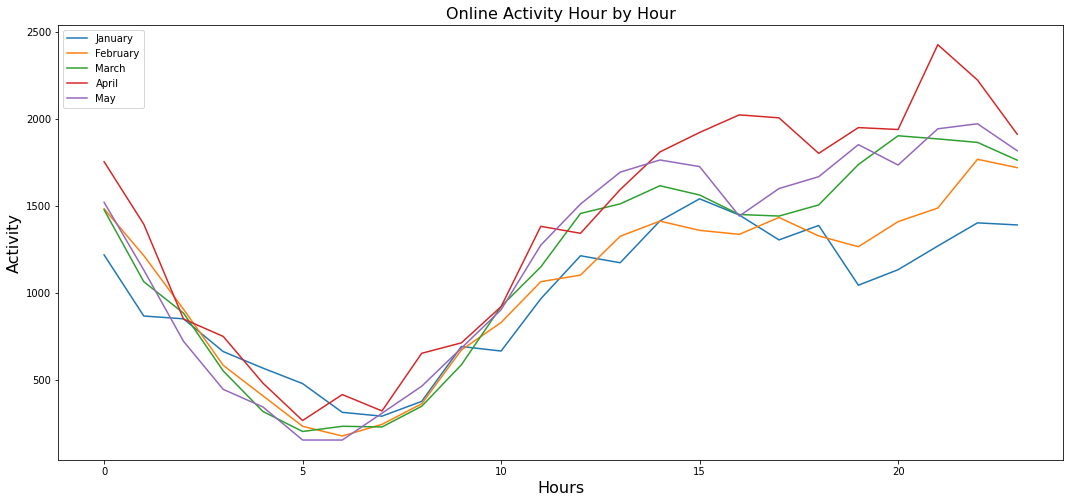

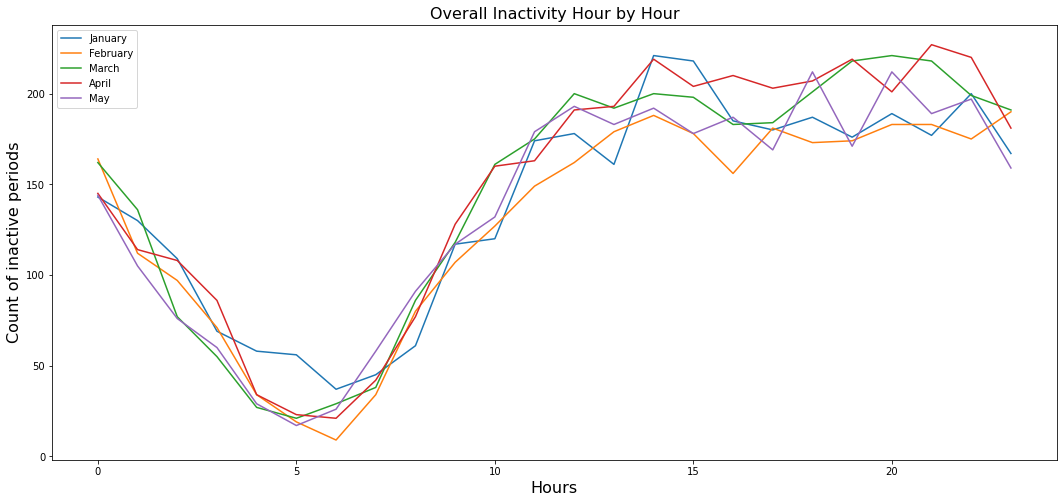

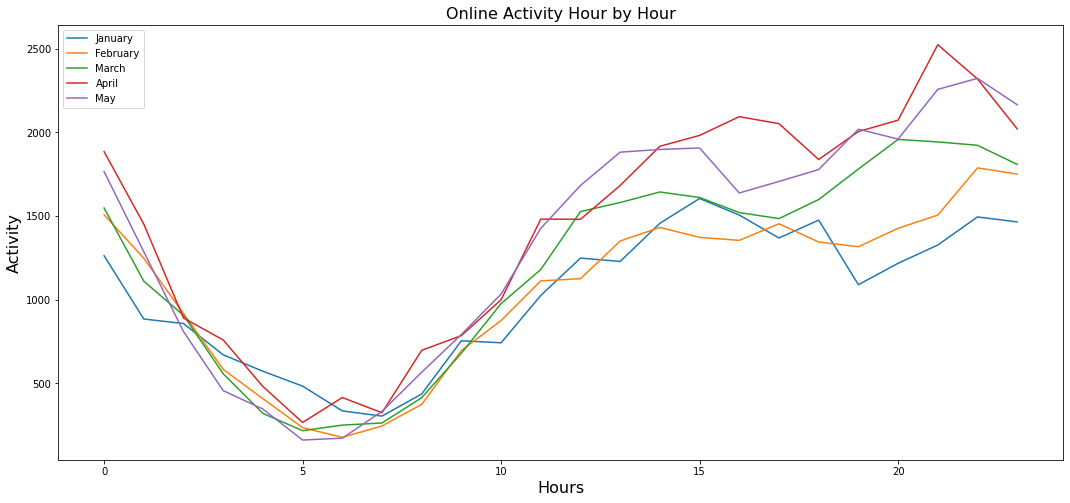

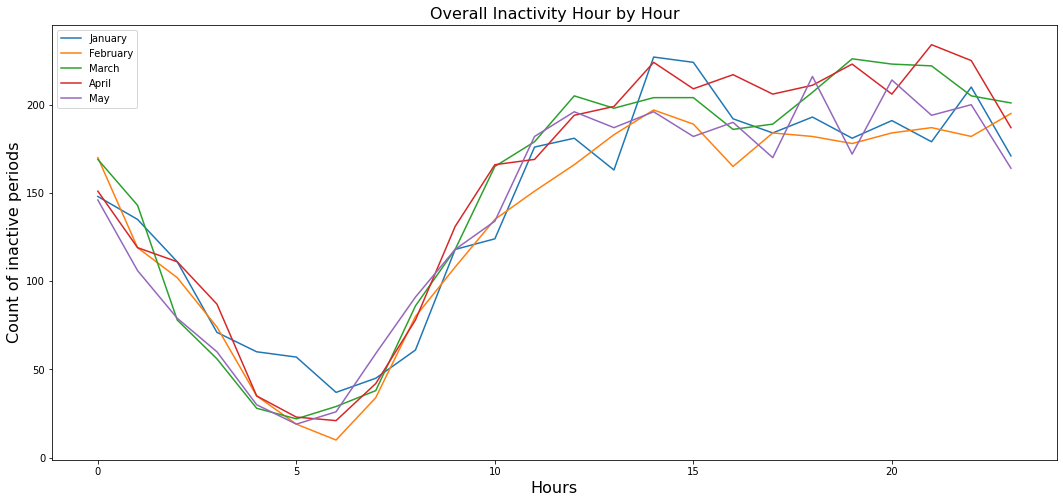

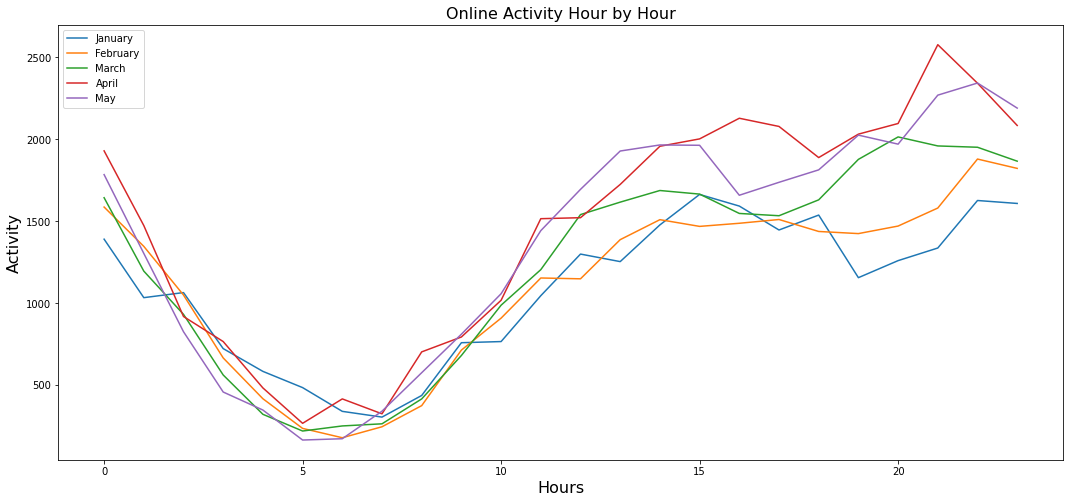

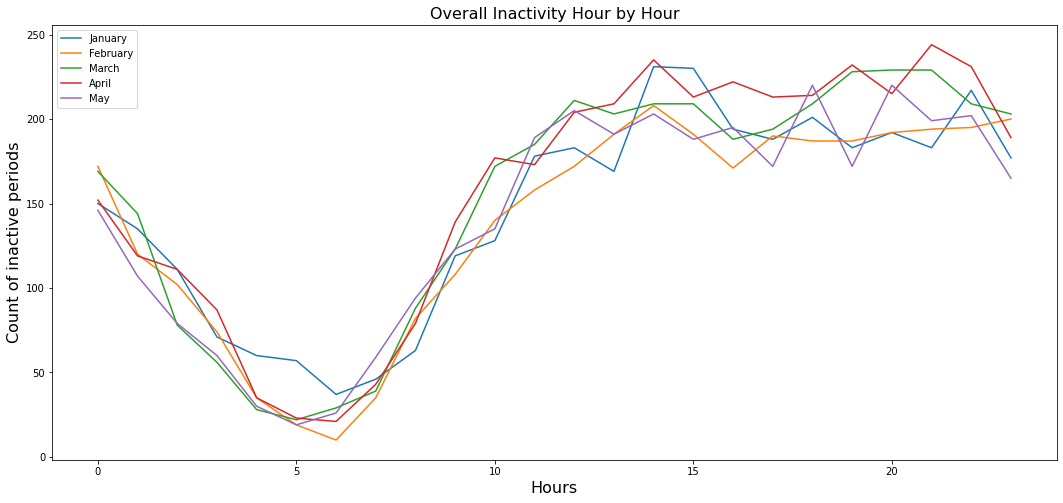

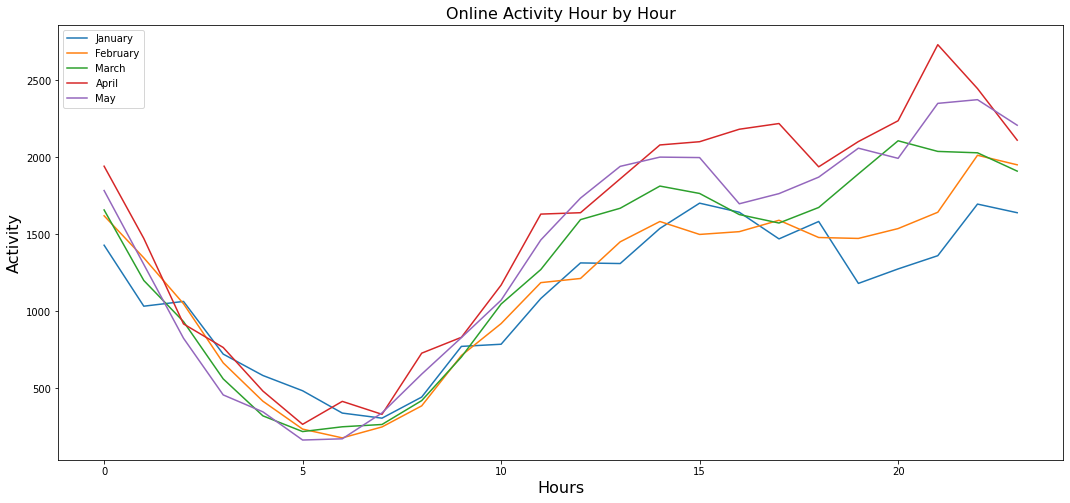

In [110]:
df_2020 = df_2020_weekend_events = df_2020_weekday_events = df_jan = df_feb = df_march = df_april = df_may = df_june = df_2019 = df_jan_march = pd.DataFrame(columns=pd.read_csv(files[0]).columns)
for f in files:
    df = pd.read_csv(f)
    df_jan = df_jan.append(df[(df.years == 2020) & (df.months == 1)], ignore_index=True)
    df_feb = df_feb.append(df[(df.years == 2020) & (df.months == 2)], ignore_index=True)
    df_march = df_march.append(df[(df.years == 2020) & (df.months == 3)], ignore_index=True)
    df_april = df_april.append(df[(df.years == 2020) & (df.months == 4)], ignore_index=True)
    df_may = df_may.append(df[(df.years == 2020) & (df.months == 5)], ignore_index=True)
    df_june = df_june.append(df[(df.years == 2020) & (df.months == 6)], ignore_index=True)
    df_2020 = df_june.append(df[(df.years == 2020) & (df.months < 6)], ignore_index=True)
    df_2020_weekend_events = df_2020.append(df[df.weekdays >= 5], ignore_index=True)
    df_2020_weekday_events = df_2020.append(df[df.weekdays < 5], ignore_index=True)
    df_2020['datetime']= pd.to_datetime(df_2020['datetime'])
    df_2020['since_previous'] = (df_2020['datetime'] - df_2020['datetime'].shift(1)).astype('timedelta64[h]')

    df_jan['datetime']= pd.to_datetime(df_jan['datetime'])
    df_jan['since_previous'] = (df_jan['datetime'] - df_jan['datetime'].shift(1)).astype('timedelta64[h]')

    df_feb['datetime']= pd.to_datetime(df_feb['datetime'])
    df_feb['since_previous'] = (df_feb['datetime'] - df_feb['datetime'].shift(1)).astype('timedelta64[h]')

    df_march['datetime']= pd.to_datetime(df_march['datetime'])
    df_march['since_previous'] = (df_march['datetime'] - df_march['datetime'].shift(1)).astype('timedelta64[h]')

    df_april['datetime']= pd.to_datetime(df_april['datetime'])
    df_april['since_previous'] = (df_april['datetime'] - df_april['datetime'].shift(1)).astype('timedelta64[h]')

    df_may['datetime']= pd.to_datetime(df_may['datetime'])
    df_may['since_previous'] = (df_may['datetime'] - df_may['datetime'].shift(1)).astype('timedelta64[h]')

    df_june['datetime']= pd.to_datetime(df_june['datetime'])
    df_june['since_previous'] = (df_june['datetime'] - df_june['datetime'].shift(1)).astype('timedelta64[h]')

    df_2020['hour_time_inactive'] = list(zip(df_2020.hours, df_2020.since_previous))
    tuples = df_2020['hour_time_inactive'].tolist()

    df_jan['hour_time_inactive'] = list(zip(df_jan.hours, df_jan.since_previous))
    tuples_jan = df_jan['hour_time_inactive'].tolist()

    df_feb['hour_time_inactive'] = list(zip(df_feb.hours, df_feb.since_previous))
    tuples_feb = df_feb['hour_time_inactive'].tolist()

    df_march['hour_time_inactive'] = list(zip(df_march.hours, df_march.since_previous))
    tuples_march = df_march['hour_time_inactive'].tolist()

    df_april['hour_time_inactive'] = list(zip(df_april.hours, df_april.since_previous))
    tuples_april = df_april['hour_time_inactive'].tolist()

    df_may['hour_time_inactive'] = list(zip(df_may.hours, df_may.since_previous))
    tuples_may = df_may['hour_time_inactive'].tolist()

    df_june['hour_time_inactive'] = list(zip(df_june.hours, df_june.since_previous))
    tuples_june = df_june['hour_time_inactive'].tolist()

    tuples_2 = []
    for i in tuples:
        if i[1] > 0.0:
            tuples_2.append(i)

    tuples_2_jan = []
    for i in tuples_jan:
        if i[1] > 0.0:
            tuples_2_jan.append(i)

    tuples_2_feb = []
    for i in tuples_feb:
        if i[1] > 0.0:
            tuples_2_feb.append(i)

    tuples_2_march = []
    for i in tuples_march:
        if i[1] > 0.0:
            tuples_2_march.append(i)

    tuples_2_april = []
    for i in tuples_april:
        if i[1] > 0.0:
            tuples_2_april.append(i)

    tuples_2_may = []
    for i in tuples_may:
        if i[1] > 0.0:
            tuples_2_may.append(i)

    tuples_2_june = []
    for i in tuples_june:
        if i[1] > 0.0:
            tuples_2_june.append(i)

    w = Counter(elem[0] for elem in tuples_2)
    w_jan = Counter(elem[0] for elem in tuples_2_jan)
    w_feb = Counter(elem[0] for elem in tuples_2_feb)
    w_march = Counter(elem[0] for elem in tuples_2_march)
    w_april = Counter(elem[0] for elem in tuples_2_april)
    w_may = Counter(elem[0] for elem in tuples_2_may)
    w_june = Counter(elem[0] for elem in tuples_2_june)
    
    plt.figure(figsize=(18, 8))
    plt.xlabel("Hours", fontsize = 16)
    plt.ylabel("Count of inactive periods", fontsize = 16)
    plt.title("Overall Inactivity Hour by Hour", fontsize = 16)


    x_jan = list(w_jan.keys())
    y_jan = list(w_jan.values())
    tuples_jan = list(zip(x_jan,y_jan))
    tuples_jan = sorted(tuples_jan, key=lambda x: x[0])
    x_jan = [j[0] for j in tuples_jan]
    y_jan = [j[1] for j in tuples_jan]
    plt.plot(x_jan, y_jan, label = "January")

    x_feb = list(w_feb.keys())
    y_feb = list(w_feb.values())
    tuples_feb = list(zip(x_feb,y_feb))
    tuples_feb = sorted(tuples_feb, key=lambda x: x[0])
    x_feb = [f[0] for f in tuples_feb]
    y_feb = [f[1] for f in tuples_feb]
    plt.plot(x_feb, y_feb, label = "February")

    x_march = list(w_march.keys())
    y_march = list(w_march.values())
    tuples_march = list(zip(x_march,y_march))
    tuples_march = sorted(tuples_march, key=lambda x: x[0])
    x_march = [m[0] for m in tuples_march]
    y_march= [m[1] for m in tuples_march]
    plt.plot(x_march, y_march, label = "March")

    x_april = list(w_april.keys())
    y_april = list(w_april.values())
    tuples_april = list(zip(x_april,y_april))
    tuples_april = sorted(tuples_april, key=lambda x: x[0])
    x_april = [a[0] for a in tuples_april]
    y_april= [a[1] for a in tuples_april]
    plt.plot(x_april, y_april, label = "April")


    x_may = list(w_may.keys())
    y_may = list(w_may.values())
    tuples_may = list(zip(x_may,y_may))
    tuples_may = sorted(tuples_may, key=lambda x: x[0])
    x_may = [q[0] for q in tuples_may]
    y_may= [q[1] for q in tuples_may]
    plt.plot(x_may, y_may, label = "May")

    plt.legend()
    
    plt.figure(figsize=(18, 8))
    plt.xlabel("Hours", fontsize = 16)
    plt.ylabel("Activity", fontsize = 16)
    plt.title("Online Activity Hour by Hour", fontsize = 16)
    d_jan = df_jan.hours.value_counts()
    tuples_ordered_pairs_jan = [tuple((x, y)) for x, y in d_jan.items()]
    tuples_ordered_pairs_jan = sorted(tuples_ordered_pairs_jan, key=lambda x: x[0])
    x_jan = [j[0] for j in tuples_ordered_pairs_jan]
    y_jan = [j[1] for j in tuples_ordered_pairs_jan]
    plt.plot(x_jan, y_jan, label = "January")


    d_feb = df_feb.hours.value_counts()
    tuples_ordered_pairs_feb = [tuple((x, y)) for x, y in d_feb.items()]
    tuples_ordered_pairs_feb = sorted(tuples_ordered_pairs_feb, key=lambda x: x[0])
    x_feb = [f[0] for f in tuples_ordered_pairs_feb]
    y_feb = [f[1] for f in tuples_ordered_pairs_feb]
    plt.plot(x_feb, y_feb, label = "February")

    d_march = df_march.hours.value_counts()
    tuples_ordered_pairs_march = [tuple((x, y)) for x, y in d_march.items()]
    tuples_ordered_pairs_march = sorted(tuples_ordered_pairs_march, key=lambda x: x[0])
    x_march = [m[0] for m in tuples_ordered_pairs_march]
    y_march = [m[1] for m in tuples_ordered_pairs_march]
    plt.plot(x_march, y_march, label = "March")

    d_april = df_april.hours.value_counts()
    tuples_ordered_pairs_april = [tuple((x, y)) for x, y in d_april.items()]
    tuples_ordered_pairs_april = sorted(tuples_ordered_pairs_april, key=lambda x: x[0])
    x_april = [a[0] for a in tuples_ordered_pairs_april]
    y_april = [a[1] for a in tuples_ordered_pairs_april]
    plt.plot(x_april, y_april, label = "April")

    d_may = df_may.hours.value_counts()
    tuples_ordered_pairs_may = [tuple((x, y)) for x, y in d_may.items()]
    tuples_ordered_pairs_may = sorted(tuples_ordered_pairs_may, key=lambda x: x[0])
    x_may = [a[0] for a in tuples_ordered_pairs_may]
    y_may = [a[1] for a in tuples_ordered_pairs_may]
    plt.plot(x_may, y_may, label = "May")


    plt.legend()




    

In [106]:
df_2020['datetime']= pd.to_datetime(df_2020['datetime'])
df_2020['since_previous'] = (df_2020['datetime'] - df_2020['datetime'].shift(1)).astype('timedelta64[h]')

df_jan['datetime']= pd.to_datetime(df_jan['datetime'])
df_jan['since_previous'] = (df_jan['datetime'] - df_jan['datetime'].shift(1)).astype('timedelta64[h]')

df_feb['datetime']= pd.to_datetime(df_feb['datetime'])
df_feb['since_previous'] = (df_feb['datetime'] - df_feb['datetime'].shift(1)).astype('timedelta64[h]')

df_march['datetime']= pd.to_datetime(df_march['datetime'])
df_march['since_previous'] = (df_march['datetime'] - df_march['datetime'].shift(1)).astype('timedelta64[h]')

df_april['datetime']= pd.to_datetime(df_april['datetime'])
df_april['since_previous'] = (df_april['datetime'] - df_april['datetime'].shift(1)).astype('timedelta64[h]')

df_may['datetime']= pd.to_datetime(df_may['datetime'])
df_may['since_previous'] = (df_may['datetime'] - df_may['datetime'].shift(1)).astype('timedelta64[h]')

df_june['datetime']= pd.to_datetime(df_june['datetime'])
df_june['since_previous'] = (df_june['datetime'] - df_june['datetime'].shift(1)).astype('timedelta64[h]')

df_2020['hour_time_inactive'] = list(zip(df_2020.hours, df_2020.since_previous))
tuples = df_2020['hour_time_inactive'].tolist()

df_jan['hour_time_inactive'] = list(zip(df_jan.hours, df_jan.since_previous))
tuples_jan = df_jan['hour_time_inactive'].tolist()

df_feb['hour_time_inactive'] = list(zip(df_feb.hours, df_feb.since_previous))
tuples_feb = df_feb['hour_time_inactive'].tolist()

df_march['hour_time_inactive'] = list(zip(df_march.hours, df_march.since_previous))
tuples_march = df_march['hour_time_inactive'].tolist()

df_april['hour_time_inactive'] = list(zip(df_april.hours, df_april.since_previous))
tuples_april = df_april['hour_time_inactive'].tolist()

df_may['hour_time_inactive'] = list(zip(df_may.hours, df_may.since_previous))
tuples_may = df_may['hour_time_inactive'].tolist()

df_june['hour_time_inactive'] = list(zip(df_june.hours, df_june.since_previous))
tuples_june = df_june['hour_time_inactive'].tolist()

tuples_2 = []
for i in tuples:
    if i[1] > 0.0:
        tuples_2.append(i)
        
tuples_2_jan = []
for i in tuples_jan:
    if i[1] > 0.0:
        tuples_2_jan.append(i)
        
tuples_2_feb = []
for i in tuples_feb:
    if i[1] > 0.0:
        tuples_2_feb.append(i)
        
tuples_2_march = []
for i in tuples_march:
    if i[1] > 0.0:
        tuples_2_march.append(i)
        
tuples_2_april = []
for i in tuples_april:
    if i[1] > 0.0:
        tuples_2_april.append(i)
        
tuples_2_may = []
for i in tuples_may:
    if i[1] > 0.0:
        tuples_2_may.append(i)

tuples_2_june = []
for i in tuples_june:
    if i[1] > 0.0:
        tuples_2_june.append(i)



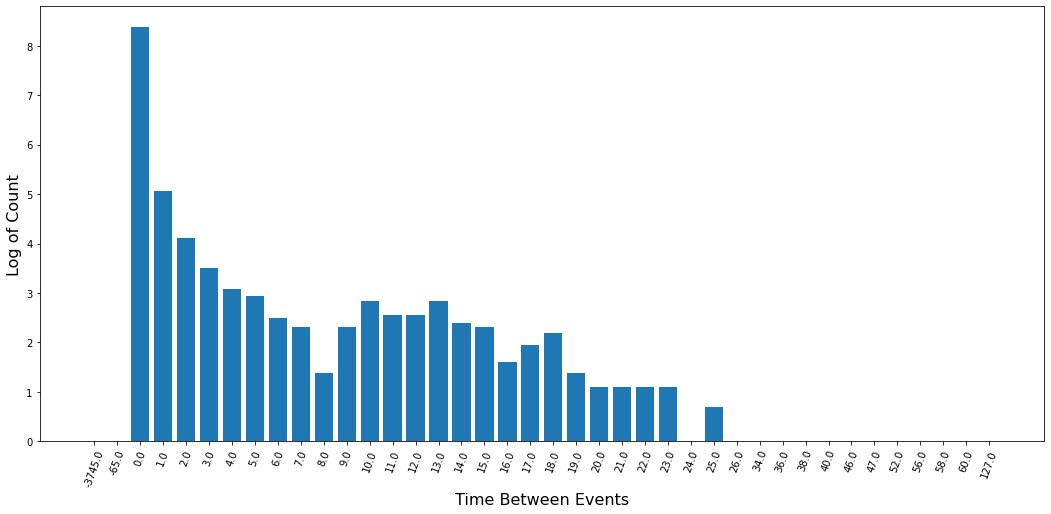

In [5]:

plt.figure(figsize=(18, 8))

plt.xlabel("Time Between Events", fontsize = 16)
plt.ylabel("Log of Count", fontsize = 16)
count = np.log(df_2020['since_previous'].value_counts())
tuples = [tuple((x, y)) for x, y in count.items()]
tuples = sorted(tuples, key=lambda x: x[0])

plt.bar(range(len(tuples)), [val[1] for val in tuples], align='center')
plt.xticks(range(len(tuples)), [val[0] for val in tuples])
plt.xticks(rotation=70)
plt.show()

In [107]:
w = Counter(elem[0] for elem in tuples_2)
w_jan = Counter(elem[0] for elem in tuples_2_jan)
w_feb = Counter(elem[0] for elem in tuples_2_feb)
w_march = Counter(elem[0] for elem in tuples_2_march)
w_april = Counter(elem[0] for elem in tuples_2_april)
w_may = Counter(elem[0] for elem in tuples_2_may)
w_june = Counter(elem[0] for elem in tuples_2_june)

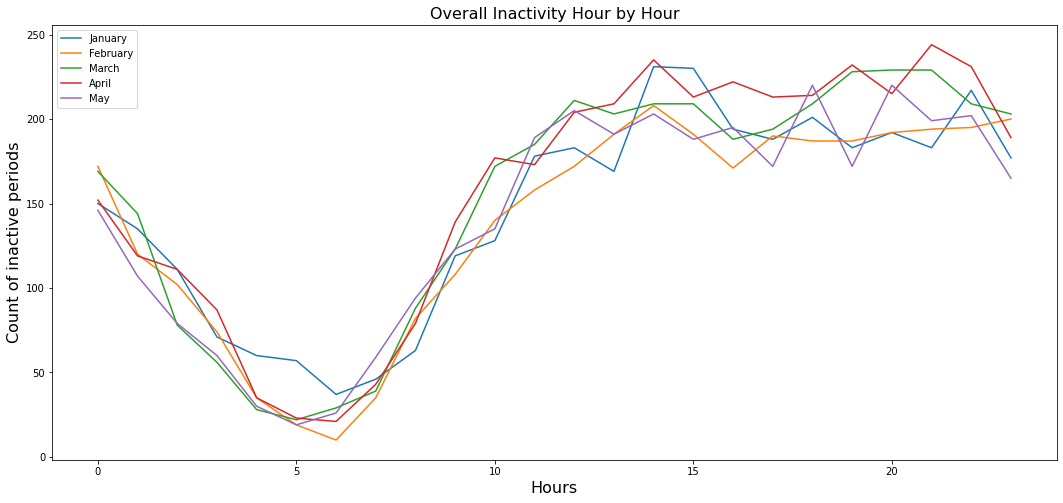

In [108]:
plt.figure(figsize=(18, 8))
plt.xlabel("Hours", fontsize = 16)
plt.ylabel("Count of inactive periods", fontsize = 16)
plt.title("Overall Inactivity Hour by Hour", fontsize = 16)


x_jan = list(w_jan.keys())
y_jan = list(w_jan.values())
tuples_jan = list(zip(x_jan,y_jan))
tuples_jan = sorted(tuples_jan, key=lambda x: x[0])
x_jan = [j[0] for j in tuples_jan]
y_jan = [j[1] for j in tuples_jan]
plt.plot(x_jan, y_jan, label = "January")

x_feb = list(w_feb.keys())
y_feb = list(w_feb.values())
tuples_feb = list(zip(x_feb,y_feb))
tuples_feb = sorted(tuples_feb, key=lambda x: x[0])
x_feb = [f[0] for f in tuples_feb]
y_feb = [f[1] for f in tuples_feb]
plt.plot(x_feb, y_feb, label = "February")

x_march = list(w_march.keys())
y_march = list(w_march.values())
tuples_march = list(zip(x_march,y_march))
tuples_march = sorted(tuples_march, key=lambda x: x[0])
x_march = [m[0] for m in tuples_march]
y_march= [m[1] for m in tuples_march]
plt.plot(x_march, y_march, label = "March")

x_april = list(w_april.keys())
y_april = list(w_april.values())
tuples_april = list(zip(x_april,y_april))
tuples_april = sorted(tuples_april, key=lambda x: x[0])
x_april = [a[0] for a in tuples_april]
y_april= [a[1] for a in tuples_april]
plt.plot(x_april, y_april, label = "April")


x_may = list(w_may.keys())
y_may = list(w_may.values())
tuples_may = list(zip(x_may,y_may))
tuples_may = sorted(tuples_may, key=lambda x: x[0])
x_may = [q[0] for q in tuples_may]
y_may= [q[1] for q in tuples_may]
plt.plot(x_may, y_may, label = "May")


plt.legend()

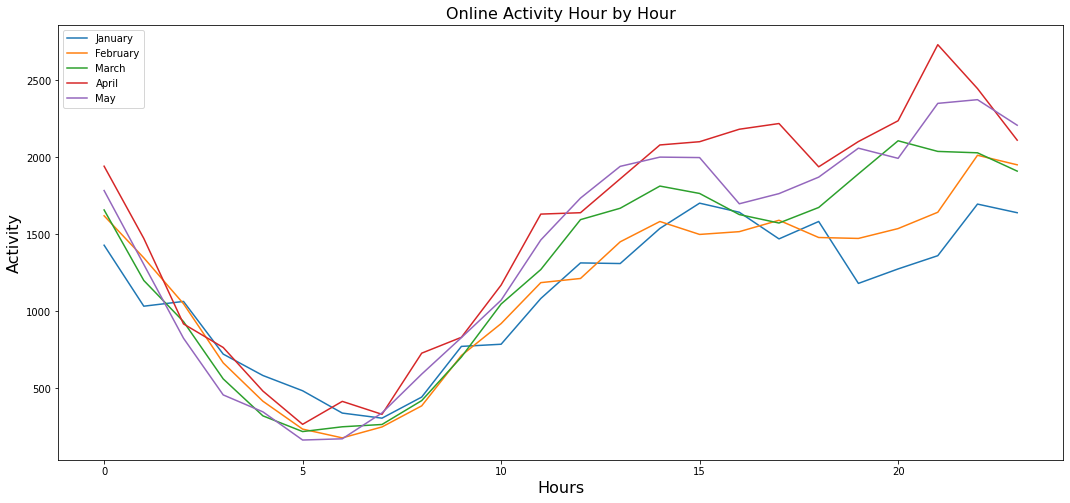

In [102]:

plt.figure(figsize=(18, 8))
plt.xlabel("Hours", fontsize = 16)
plt.ylabel("Activity", fontsize = 16)
plt.title("Online Activity Hour by Hour", fontsize = 16)
d_jan = df_jan.hours.value_counts()
tuples_ordered_pairs_jan = [tuple((x, y)) for x, y in d_jan.items()]
tuples_ordered_pairs_jan = sorted(tuples_ordered_pairs_jan, key=lambda x: x[0])
x_jan = [j[0] for j in tuples_ordered_pairs_jan]
y_jan = [j[1] for j in tuples_ordered_pairs_jan]
plt.plot(x_jan, y_jan, label = "January")


d_feb = df_feb.hours.value_counts()
tuples_ordered_pairs_feb = [tuple((x, y)) for x, y in d_feb.items()]
tuples_ordered_pairs_feb = sorted(tuples_ordered_pairs_feb, key=lambda x: x[0])
x_feb = [f[0] for f in tuples_ordered_pairs_feb]
y_feb = [f[1] for f in tuples_ordered_pairs_feb]
plt.plot(x_feb, y_feb, label = "February")

d_march = df_march.hours.value_counts()
tuples_ordered_pairs_march = [tuple((x, y)) for x, y in d_march.items()]
tuples_ordered_pairs_march = sorted(tuples_ordered_pairs_march, key=lambda x: x[0])
x_march = [m[0] for m in tuples_ordered_pairs_march]
y_march = [m[1] for m in tuples_ordered_pairs_march]
plt.plot(x_march, y_march, label = "March")

d_april = df_april.hours.value_counts()
tuples_ordered_pairs_april = [tuple((x, y)) for x, y in d_april.items()]
tuples_ordered_pairs_april = sorted(tuples_ordered_pairs_april, key=lambda x: x[0])
x_april = [a[0] for a in tuples_ordered_pairs_april]
y_april = [a[1] for a in tuples_ordered_pairs_april]
plt.plot(x_april, y_april, label = "April")

d_may = df_may.hours.value_counts()
tuples_ordered_pairs_may = [tuple((x, y)) for x, y in d_may.items()]
tuples_ordered_pairs_may = sorted(tuples_ordered_pairs_may, key=lambda x: x[0])
x_may = [a[0] for a in tuples_ordered_pairs_may]
y_may = [a[1] for a in tuples_ordered_pairs_may]
plt.plot(x_may, y_may, label = "May")


plt.legend()


In [ ]:
# df_2020['datetime']= pd.to_datetime(df_2020['datetime'])
#     df_2020['since_previous'] = (df_2020['datetime'] - df_2020['datetime'].shift(1)).astype('timedelta64[h]')

#     df_jan['datetime']= pd.to_datetime(df_jan['datetime'])
#     df_jan['since_previous'] = (df_jan['datetime'] - df_jan['datetime'].shift(1)).astype('timedelta64[h]')

#     df_feb['datetime']= pd.to_datetime(df_feb['datetime'])
#     df_feb['since_previous'] = (df_feb['datetime'] - df_feb['datetime'].shift(1)).astype('timedelta64[h]')

#     df_march['datetime']= pd.to_datetime(df_march['datetime'])
#     df_march['since_previous'] = (df_march['datetime'] - df_march['datetime'].shift(1)).astype('timedelta64[h]')

#     df_april['datetime']= pd.to_datetime(df_april['datetime'])
#     df_april['since_previous'] = (df_april['datetime'] - df_april['datetime'].shift(1)).astype('timedelta64[h]')

#     df_may['datetime']= pd.to_datetime(df_may['datetime'])
#     df_may['since_previous'] = (df_may['datetime'] - df_may['datetime'].shift(1)).astype('timedelta64[h]')

#     df_june['datetime']= pd.to_datetime(df_june['datetime'])
#     df_june['since_previous'] = (df_june['datetime'] - df_june['datetime'].shift(1)).astype('timedelta64[h]')

#     df_2020['hour_time_inactive'] = list(zip(df_2020.hours, df_2020.since_previous))
#     tuples = df_2020['hour_time_inactive'].tolist()

#     df_jan['hour_time_inactive'] = list(zip(df_jan.hours, df_jan.since_previous))
#     tuples_jan = df_jan['hour_time_inactive'].tolist()

#     df_feb['hour_time_inactive'] = list(zip(df_feb.hours, df_feb.since_previous))
#     tuples_feb = df_feb['hour_time_inactive'].tolist()

#     df_march['hour_time_inactive'] = list(zip(df_march.hours, df_march.since_previous))
#     tuples_march = df_march['hour_time_inactive'].tolist()

#     df_april['hour_time_inactive'] = list(zip(df_april.hours, df_april.since_previous))
#     tuples_april = df_april['hour_time_inactive'].tolist()

#     df_may['hour_time_inactive'] = list(zip(df_may.hours, df_may.since_previous))
#     tuples_may = df_may['hour_time_inactive'].tolist()

#     df_june['hour_time_inactive'] = list(zip(df_june.hours, df_june.since_previous))
#     tuples_june = df_june['hour_time_inactive'].tolist()
    
#     plt.figure(figsize=(18, 8))
#     plt.xlabel("Hours", fontsize = 16)
#     plt.ylabel("Count of inactive periods", fontsize = 16)
#     plt.title("Overall Inactivity Hour by Hour", fontsize = 16)
#     plt.bar(w.keys(), w.values())

#     plt.figure(figsize=(18, 8))
#     plt.xlabel("Hours", fontsize = 16)
#     plt.ylabel("Count of inactive periods", fontsize = 16)
#     plt.title("January Inactivity Hour by Hour", fontsize = 16)
#     plt.bar(w_jan.keys(), w_jan.values())

#     plt.figure(figsize=(18, 8))
#     plt.xlabel("Hours", fontsize = 16)
#     plt.ylabel("Count of inactive periods", fontsize = 16)
#     plt.title("February Inactivity Hour by Hour", fontsize = 16)
#     plt.bar(w_feb.keys(), w_feb.values())

#     plt.figure(figsize=(18, 8))
#     plt.xlabel("Hours", fontsize = 16)
#     plt.ylabel("Count of inactive periods", fontsize = 16)
#     plt.title("March Inactivity Hour by Hour", fontsize = 16)
#     plt.bar(w_march.keys(), w_march.values())

#     plt.figure(figsize=(18, 8))
#     plt.xlabel("Hours", fontsize = 16)
#     plt.ylabel("Count of inactive periods", fontsize = 16)
#     plt.title("April Inactivity Hour by Hour", fontsize = 16)
#     plt.bar(w_april.keys(), w_april.values())

#     plt.figure(figsize=(18, 8))
#     plt.xlabel("Hours", fontsize = 16)
#     plt.ylabel("Count of inactive periods", fontsize = 16)
#     plt.title("May Inactivity Hour by Hour", fontsize = 16)
#     plt.bar(w_may.keys(), w_may.values())

#     plt.figure(figsize=(18, 8))
#     plt.xlabel("Hours", fontsize = 16)
#     plt.ylabel("Count of inactive periods", fontsize = 16)
#     plt.title("June Inactivity Hour by Hour", fontsize = 16)
#     plt.bar(w_june.keys(), w_june.values())